In [1]:
import os
# os.environ['R_HOME'] = '/stornext/Home/data/allstaff/h/hediyehzadeh.s/.conda/envs/pathwayr/lib/R'

In [2]:
import sys
sys.path

['/stornext/General/data/academic/lab_davis/Yi_Soroor/scDECAF_reproducibility/kang_pbmc',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python39.zip',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python3.9',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python3.9/lib-dynload',
 '',
 '/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python3.9/site-packages']

In [3]:
sys.path.append('/stornext/Home/data/allstaff/h/hediyehzadeh.s/.conda/envs/pathwayr/lib/python3.9/site-packages/')
# sys.path.append('/stornext/Home/data/allstaff/h/hediyehzadeh.s/.conda/envs/pathwayr/lib/')

In [4]:
sys.path

['/stornext/General/data/academic/lab_davis/Yi_Soroor/scDECAF_reproducibility/kang_pbmc',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python39.zip',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python3.9',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python3.9/lib-dynload',
 '',
 '/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages',
 '/stornext/System/data/apps/python/python-3.9.5/lib/python3.9/site-packages',
 '/stornext/Home/data/allstaff/h/hediyehzadeh.s/.conda/envs/pathwayr/lib/python3.9/site-packages/']

In [5]:
# !export LD_LIBRARY_PATH=/stornext/Home/data/allstaff/h/hediyehzadeh.s/.conda/envs/pathwayr/x86_64-conda-linux-gnu/lib:$LD_LIBRARY_PATH

In [6]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
# import gdown
import rpy2
from rpy2.robjects import r
import random
import session_info
import anndata2ri
import matplotlib as mpl




anndata2ri.activate()

In [7]:
# !python -m rpy2.situation

In [8]:
sc.settings.set_figure_params(dpi=300, frameon=False)
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(4, 4))

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
.libPaths()

[1] "/stornext/Home/data/allstaff/h/hediyehzadeh.s/R/x86_64-pc-linux-gnu-library/4.1"
[2] "/stornext/System/data/apps/R/R-4.1.2/lib64/R/library"                           


In [11]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(fgsea)
    library(Seurat)
    library(ggplot2)
})

In [12]:
%%R
devtools::load_all(path="../../scDECAF")

GetMSigDB <- function(database="Hallmarks"){
  
  
  Hallmark_Geneset_DIR <- "../../benchmarking/GeneSets/h.all.v7.2.symbols.gmt"
  C2_DIR <- "../../benchmarking/GeneSets/c2.all.v7.2.symbols.gmt"

  if (database == "Hallmarks") {
    Hallmark_Genesets <- list()
    conn <- file(Hallmark_Geneset_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      Hallmark_Genesets[[iName]] <- iList
     # Hallmark_Genesets <- c(Hallmark_Genesets, list(GeneSet(setName=iName, geneIds=iList)))
    }
    close(conn)
    return(Hallmark_Genesets)
    
  } else if (database == "C2") {
    C2_Genesets <- list()
    conn <- file(C2_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      C2_Genesets[[iName]] <- iList
      #C2_Genesets <- c(C2_Genesets, list(GeneSet(setName=iName, geneIds=iList)))
    }
    close(conn)
    return(C2_Genesets)
  } else if (database == "Both"){
    Genesets <- list()
    conn <- file(Hallmark_Geneset_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      Genesets[[iName]] <- iList

    }
    close(conn)

    conn <- file(C2_DIR,open="r")
    linn <-readLines(conn)
    for (i in 1:length(linn)){
      iLine <- linn[i]
      iLine <- strsplit(iLine, "\t")
      iName <- iLine[[1]][1]
      iList <- iLine[[1]]
      iList <- iList[3:length(iList)]
      Genesets[[iName]] <- iList

    }
    close(conn)
    
    return(Genesets)
  }

}


HM_genesets <- GetMSigDB(database="Hallmarks")

R[write to console]: Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom



ℹ Loading scDECAF


In [13]:
# !wget -O 'kang_counts_25k.h5ad' https://figshare.com/ndownloader/files/34464122

In [14]:
adata_25k = sc.read("kang_counts_25k.h5ad")
adata_25k

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [15]:
adata = adata_25k.copy()

In [16]:
adata.layers['counts'] = adata.X

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [18]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=4000,
    flavor="seurat_v3",
    subset=True,
    layer="counts"
)

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [19]:
import umap

X = adata.X
trans = umap.UMAP(
    n_neighbors=10, 
    random_state=42,
    min_dist=0.4,
)
adata.obsm["X_umap"] = trans.fit_transform(X)

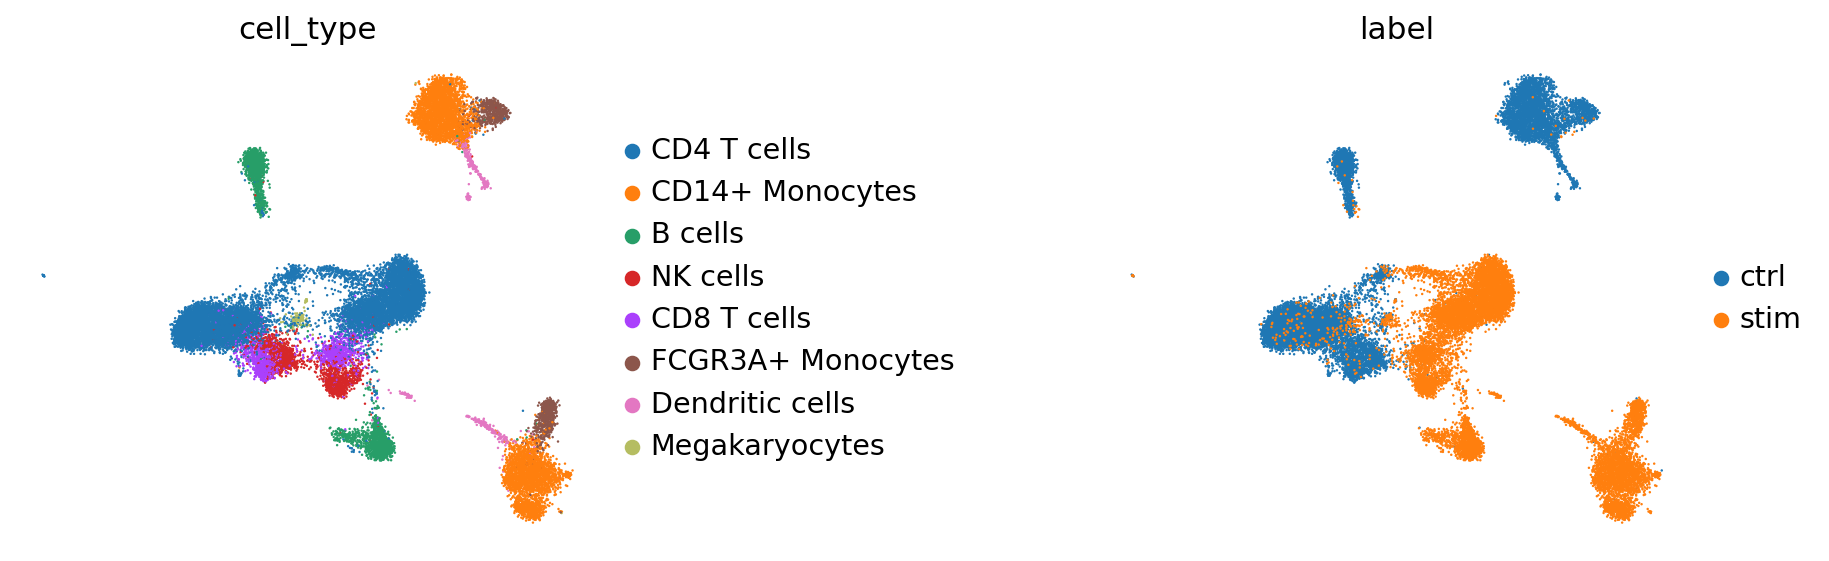

In [20]:
sc.pl.umap(
    adata, 
    color=["cell_type", "label"], 
    frameon=False,
    wspace = 0.7,
    ncols=2,
)

In [21]:
# put count data back
adata.X = adata.layers['counts']

In [22]:
adata.X = adata.X.A

In [23]:
type(adata.X)

numpy.ndarray

In [24]:
# adata_ = adata.copy()
adata_ = adata_25k.copy()
adata_.X = adata_.X.A

In [25]:
adata_

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [26]:
# del adata_.obsm
# # del adata_.obs
# del adata_.var

In [27]:
type(adata_.X)

numpy.ndarray

In [28]:
# del adata_.uns

In [29]:
# del adata_.layers

In [30]:
# import sys
# sys.setrecursionlimit(15000)

In [31]:
adata_

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [32]:
# del adata_.obsm

In [33]:
%%R -i adata_
pbmc <- as.Seurat(adata_, counts = "X", data = NULL)
pbmc

/home/users/allstaff/hediyehzadeh.s/.local/lib/python3.9/site-packages/anndata2ri/r2py.py:102: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


An object of class Seurat 
15706 features across 24673 samples within 1 assay 
Active assay: originalexp (15706 features, 0 variable features)
 2 dimensional reductions calculated: PCA, UMAP


In [34]:
%%R
2+2

[1] 4


In [35]:
%%R
pbmc = RenameAssays(object = pbmc, originalexp = 'RNA')

R[write to console]: Renaming default assay from originalexp to RNA



In [36]:
%%R
# scTransform normalisation in Seurat
pbmc <- SCTransform(object = pbmc, verbose = FALSE, variable.features.n = 2000)
pbmc

An object of class Seurat 
30364 features across 24673 samples within 2 assays 
Active assay: SCT (14658 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: PCA, UMAP


In [37]:
%%R
x <- GetAssayData(object = pbmc, slot = 'data')# same as x <- bcdata[["SCT"]]@data, contains log-normalised values

In [38]:
%%R
hvg <- VariableFeatures(object = pbmc)

In [39]:
umap_embed = adata.obsm["X_umap"]

In [40]:
%%R -i umap_embed
cell_embedding = umap_embed

### Results for $\lambda$ = exp(-3)

R[write to console]: Computing optimal shrinkage value by cross-validation

R[write to console]: Fitting penalized multi-response gaussian GLM with alpha 0.05

R[write to console]: Returning selected genesets with non-zero regression coefficients



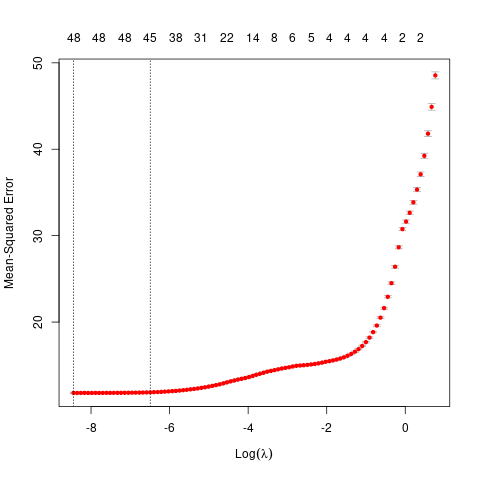

In [41]:
%%R
selected_gs <- pruneGenesets(data = x, genesetlist = HM_genesets, hvg = hvg,
                            embedding = cell_embedding, min_gs_size = 3, lambda = exp(-3))

In [42]:
%%R
names(attributes(selected_gs))


[1] "glmnet_coef"


In [43]:
%%R
as.character(selected_gs)

[1] "HALLMARK_CHOLESTEROL_HOMEOSTASIS"        
[2] "HALLMARK_INTERFERON_ALPHA_RESPONSE"      
[3] "HALLMARK_INTERFERON_GAMMA_RESPONSE"      
[4] "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"
[5] "HALLMARK_ANGIOGENESIS"                   


In [44]:
%%R
head(attributes(selected_gs)$"glmnet_coef")

$y1
48 x 1 sparse Matrix of class "dgCMatrix"
                                                  s0
                                           1.3031684
HALLMARK_TNFA_SIGNALING_VIA_NFKB           .        
HALLMARK_HYPOXIA                           .        
HALLMARK_CHOLESTEROL_HOMEOSTASIS           2.8237681
HALLMARK_MITOTIC_SPINDLE                   .        
HALLMARK_WNT_BETA_CATENIN_SIGNALING        .        
HALLMARK_TGF_BETA_SIGNALING                .        
HALLMARK_IL6_JAK_STAT3_SIGNALING           .        
HALLMARK_DNA_REPAIR                        .        
HALLMARK_G2M_CHECKPOINT                    .        
HALLMARK_APOPTOSIS                         .        
HALLMARK_ADIPOGENESIS                      .        
HALLMARK_ESTROGEN_RESPONSE_EARLY           .        
HALLMARK_ESTROGEN_RESPONSE_LATE            .        
HALLMARK_ANDROGEN_RESPONSE                 .        
HALLMARK_MYOGENESIS                        .        
HALLMARK_PROTEIN_SECRETION                 .        


In [45]:
cell_names = adata.obs_names

In [46]:
%%R -i cell_names

rownames(cell_embedding) = cell_names
target <- genesets2ids(x[match(hvg, rownames(x)),], HM_genesets[selected_gs])

dim(x)
dim(target)


# constrained scores
ann_res <- scDECAF(data = x, gs = target, standardize = FALSE, 
                   hvg = hvg, k = 10, embedding = cell_embedding,
                   n_components = ncol(target) - 1, max_iter = 2, thresh = 0.5)


R[write to console]: Learning geneset representations by CCA using 4 dimensions...




 Permutation  1  out of  10  12345678910
 Permutation  2  out of  10  12345678910
 Permutation  3  out of  10  12345678910
 Permutation  4  out of  10  12345678910
 Permutation  5  out of  10  12345678910
 Permutation  6  out of  10  12345678910
 Permutation  7  out of  10  12345678910
 Permutation  8  out of  10  12345678910
 Permutation  9  out of  10  12345678910
 Permutation  10  out of  10  12345678910
1234
1234567
123456789101112131415
12345678910


R[write to console]: Assigning cells to genesets in latent space...

R[write to console]: Verifying assignments by weighted k-nn...

R[write to console]: using 10 nearest neighbors and confidence threshold 0.5

R[write to console]: cell-geneset assignment completed.



In [47]:
%%R
scores_constrained = attributes(ann_res)$raw_scores
# cap the scores to zero
# scores[scores < 0] = 0

#OR
#normalise between 0 and 1
# scores = apply(scores, 2, FUN=function(x) (x-min(x))/(max(x)-min(x)))

scores = scale(scores_constrained)

dim(scores_constrained)

[1] 24659     5


In [48]:
%%R -o scores
scores = data.frame(scores)
colnames(scores) = paste0(colnames(scores),'_lambda_negative3')

In [49]:
adata.obs = pd.concat((adata_25k.obs, scores), axis = 1)

In [50]:
adata.obs

nCount_RNA  nFeature_RNA      tsne1      tsne2 label  \
AAACATACATTTCC-1      3017.0           877 -27.640373  14.966629  ctrl   
AAACATACCAGAAA-1      2481.0           713 -27.493646  28.924885  ctrl   
AAACATACCATGCA-1       703.0           337 -10.468194  -5.984389  ctrl   
AAACATACCTCGCT-1      3420.0           850 -24.367997  20.429285  ctrl   
AAACATACCTGGTA-1      3158.0          1111  27.952170  24.159738  ctrl   
...                      ...           ...        ...        ...   ...   
TTTGCATGCCTGAA-2      1033.0           468  18.268321   1.058202  stim   
TTTGCATGCCTGTC-2      2116.0           819 -11.563067   2.574095  stim   
TTTGCATGCTAAGC-2      1522.0           523  25.142392   6.603815  stim   
TTTGCATGGGACGA-2      1143.0           503  14.359657  10.965601  stim   
TTTGCATGTCTTAC-2      1031.0           421  14.572118  -4.713942  stim   

                  cluster        cell_type     replicate  nCount_SCT  \
AAACATACATTTCC-1        9  CD14+ Monocytes  patient_1016      1704.0   
AAACATACCAGAAA-1        9  CD14+ Monocytes  patient_1256      1614.0   
AAACATACCATGCA-1        3      CD4 T cells  patient_1488       908.0   
AAACATACCTCGCT-1        9  CD14+ Monocytes  patient_1256      1738.0   
AAACATACCTGGTA-1        4  Dendritic cells  patient_1039      1857.0   
...                   ...              ...           ...         ...   
TTTGCATGCCTGAA-2        6      CD4 T cells  patient_1244      1128.0   
TTTGCATGCCTGTC-2        4          B cells  patient_1256      1669.0   
TTTGCATGCTAAGC-2        6      CD4 T cells   patient_107      1422.0   
TTTGCATGGGACGA-2        6      CD4 T cells  patient_1488      1185.0   
TTTGCATGTCTTAC-2        5      CD4 T cells  patient_1016      1144.0   

                  nFeature_SCT integrated_snn_res.0.4 seurat_clusters  \
AAACATACATTTCC-1           711                      1               1   
AAACATACCAGAAA-1           662                      1               1   
AAACATACCATGCA-1           337                      6               6   
AAACATACCTCGCT-1           653                      1               1   
AAACATACCTGGTA-1           928                     12              12   
...                        ...                    ...             ...   
TTTGCATGCCTGAA-2           468                      2               2   
TTTGCATGCCTGTC-2           799                      3               3   
TTTGCATGCTAAGC-2           523                      0               0   
TTTGCATGGGACGA-2           503                      0               0   
TTTGCATGTCTTAC-2           419                      2               2   

                  HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative3  \
AAACATACATTTCC-1                                           1.717730   
AAACATACCAGAAA-1                                           1.002653   
AAACATACCATGCA-1                                          -1.500810   
AAACATACCTCGCT-1                                           1.014414   
AAACATACCTGGTA-1                                          -1.490951   
...                                                             ...   
TTTGCATGCCTGAA-2                                           0.187329   
TTTGCATGCCTGTC-2                                           0.128075   
TTTGCATGCTAAGC-2                                          -1.166044   
TTTGCATGGGACGA-2                                           0.456397   
TTTGCATGTCTTAC-2                                          -1.065189   

                  HALLMARK_INTERFERON_ALPHA_RESPONSE_lambda_negative3  \
AAACATACATTTCC-1                                          -0.705614     
AAACATACCAGAAA-1                                          -1.057854     
AAACATACCATGCA-1                                          -0.316479     
AAACATACCTCGCT-1                                          -0.750880     
AAACATACCTGGTA-1                                          -0.449096     
...                                                             ...     
TTTGCATGCCTGAA-2       

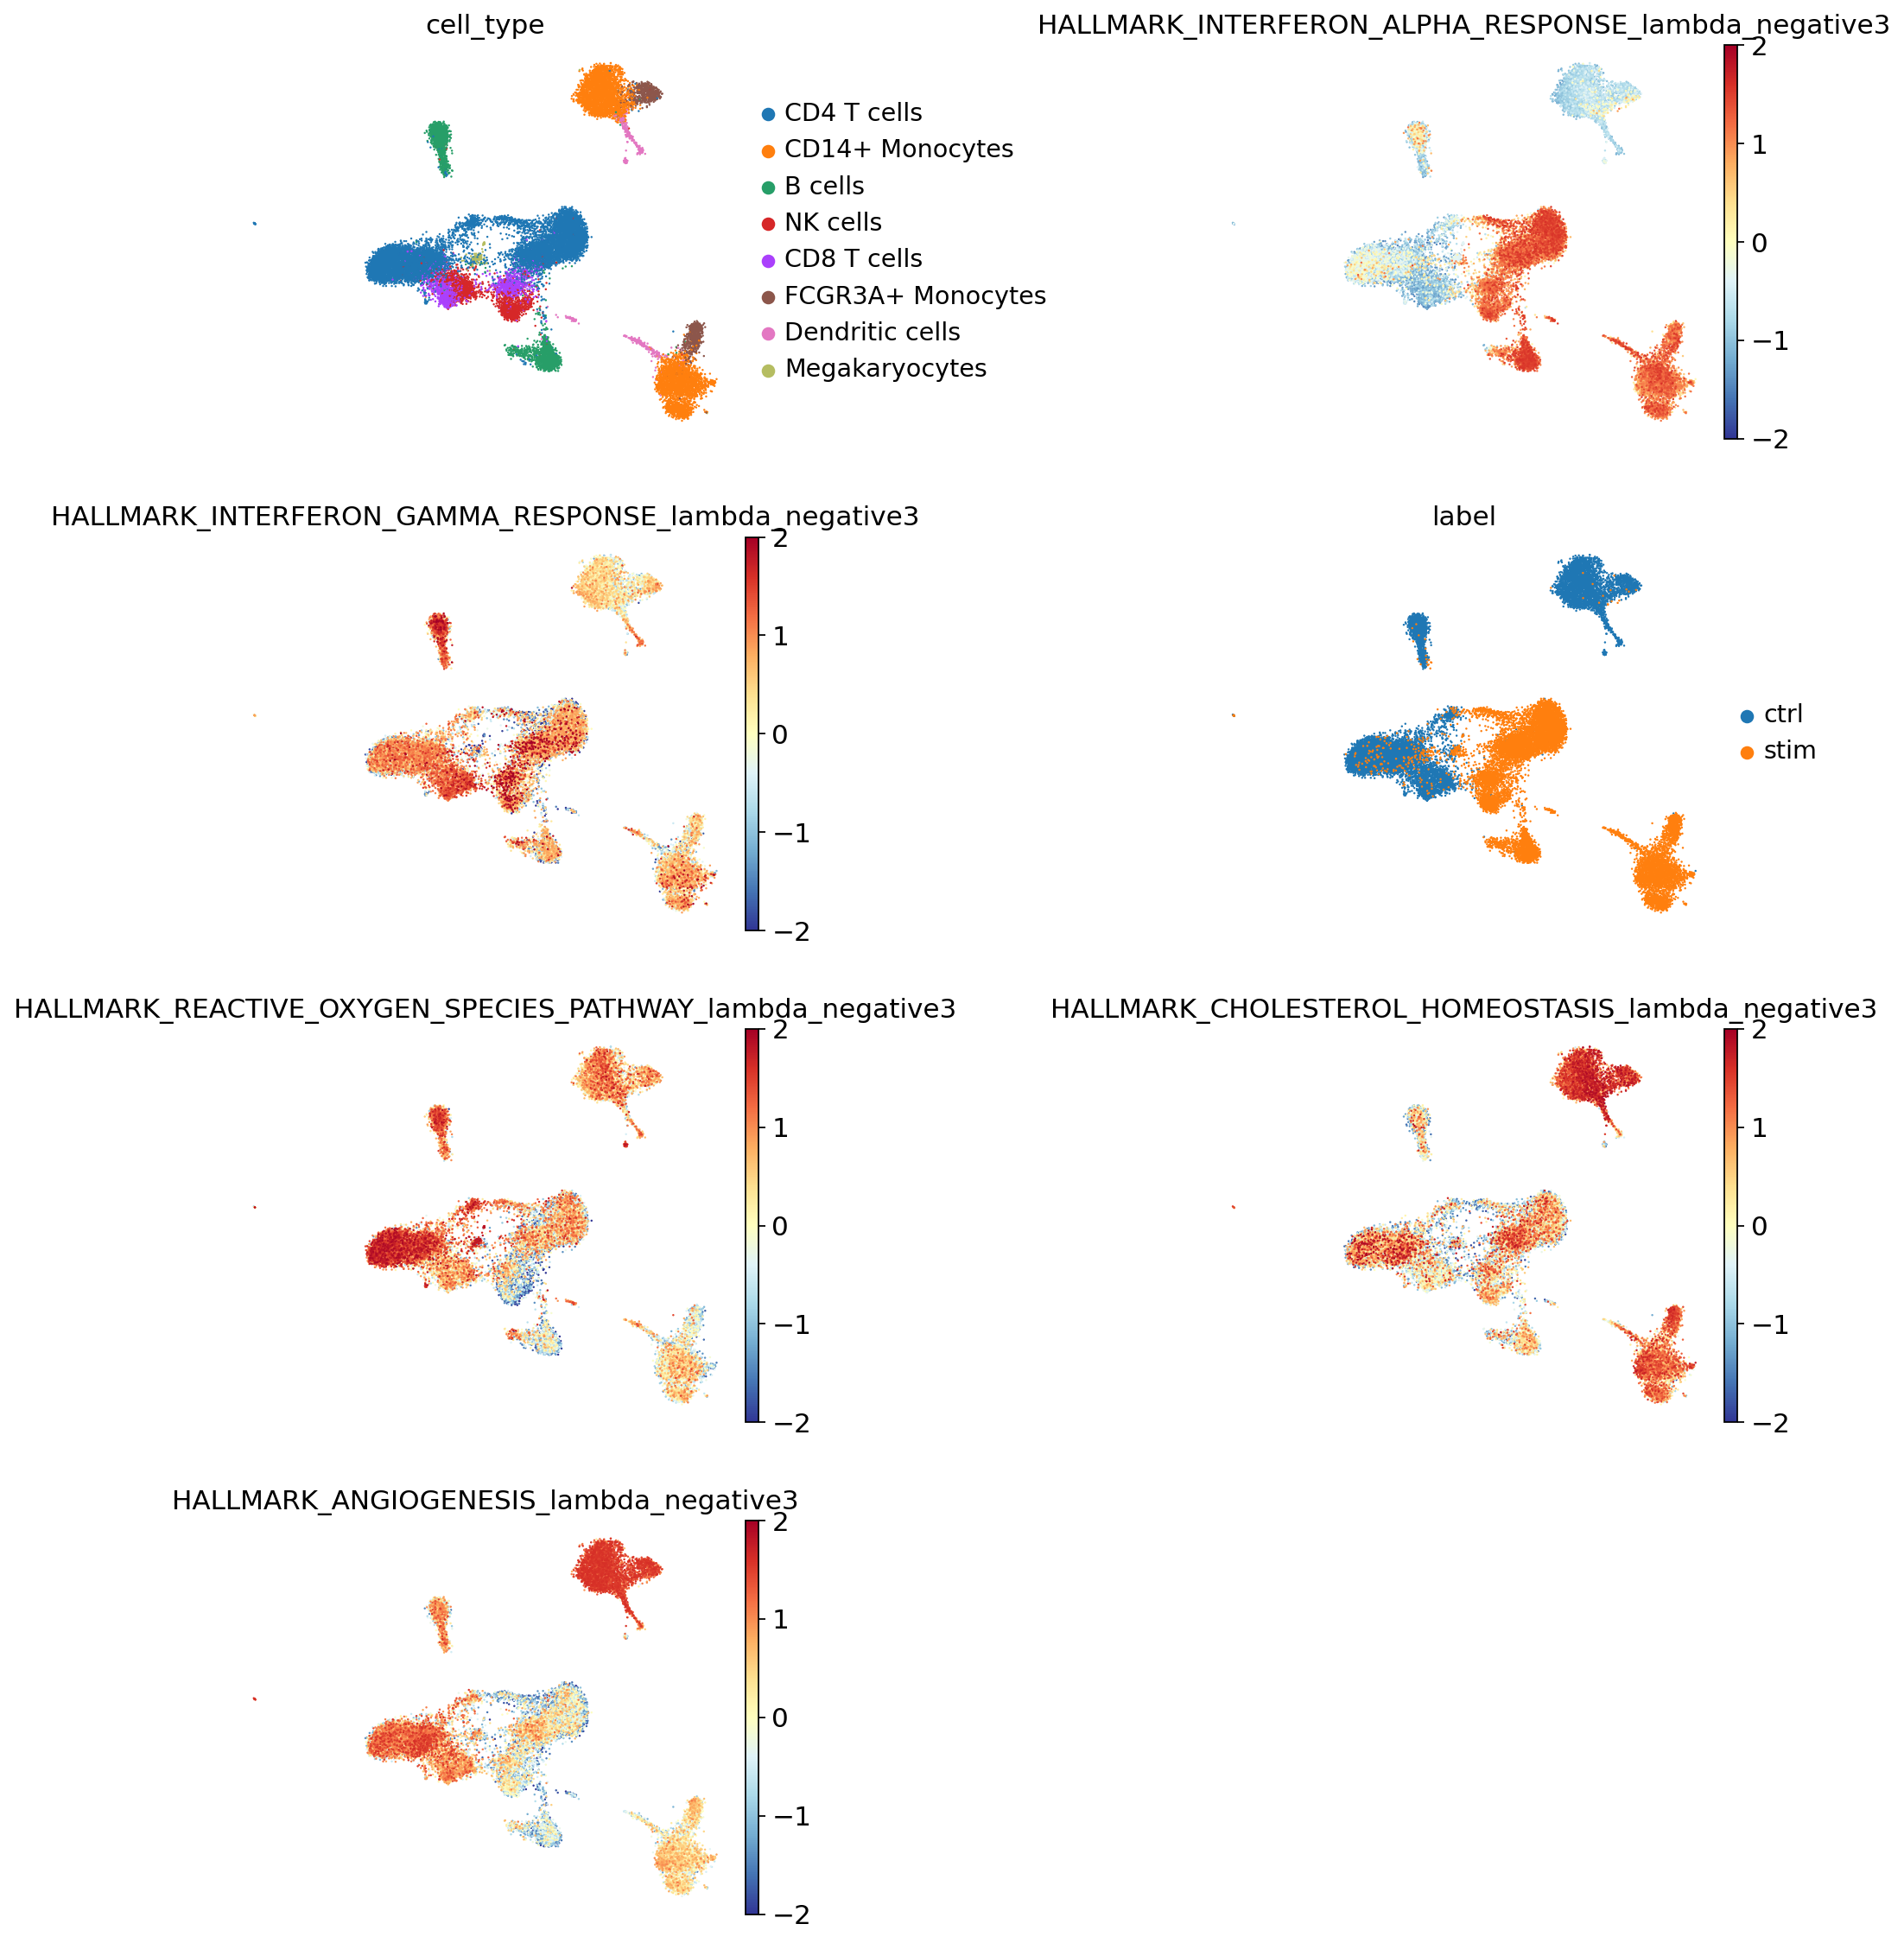

In [51]:
sc.pl.umap(
    adata, 
    color=["cell_type",  
          "HALLMARK_INTERFERON_ALPHA_RESPONSE_lambda_negative3",
#            "HALLMARK_IL2_STAT5_SIGNALING" ,
          "HALLMARK_INTERFERON_GAMMA_RESPONSE_lambda_negative3",
#            "HALLMARK_INFLAMMATORY_RESPONSE",
#           "HALLMARK_MYC_TARGETS_V1", 
           "label",
          "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY_lambda_negative3",
           "HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative3",
          "HALLMARK_ANGIOGENESIS_lambda_negative3",
          ], 
    frameon=False,
    wspace = 0.75,
    ncols=2,
    vmin = -2,
    vmax = 2,
    color_map=mpl.cm.RdYlBu_r, # RdYlBu
    save = '_kang_pbmc_25k_scDECAF_lambda_negative3.png'
)

### Results for $\lambda$ = exp(-4)

R[write to console]: Computing optimal shrinkage value by cross-validation

R[write to console]: Fitting penalized multi-response gaussian GLM with alpha 0.018

R[write to console]: Returning selected genesets with non-zero regression coefficients

R[write to console]: Learning geneset representations by CCA using 12 dimensions...




 Permutation  1  out of  10  12345678910
 Permutation  2  out of  10  12345678910
 Permutation  3  out of  10  12345678910
 Permutation  4  out of  10  12345678910
 Permutation  5  out of  10  12345678910
 Permutation  6  out of  10  12345678910
 Permutation  7  out of  10  12345678910
 Permutation  8  out of  10  12345678910
 Permutation  9  out of  10  12345678910
 Permutation  10  out of  10  12345678910
123456
123456789101112131415
1234567
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415


R[write to console]: Assigning cells to genesets in latent space...

R[write to console]: Verifying assignments by weighted k-nn...

R[write to console]: using 10 nearest neighbors and confidence threshold 0.5

R[write to console]: cell-geneset assignment completed.



[1] 24672    13


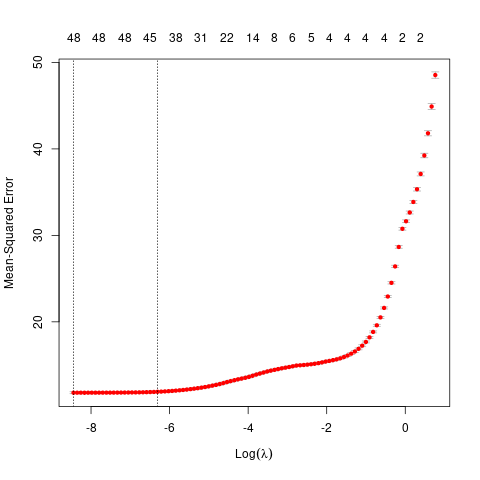

In [52]:
%%R 
selected_gs <- pruneGenesets(data = x, genesetlist = HM_genesets, hvg = hvg,
                            embedding = cell_embedding, min_gs_size = 3, lambda = exp(-4))


target <- genesets2ids(x[match(hvg, rownames(x)),], HM_genesets[selected_gs])



# constrained scores
ann_res <- scDECAF(data = x, gs = target, standardize = FALSE, 
                   hvg = hvg, k = 10, embedding = cell_embedding,
                   n_components = ncol(target) - 1, max_iter = 2, thresh = 0.5)


scores_constrained = attributes(ann_res)$raw_scores
# scores = scale(scores_constrained)

scores = scale(scores_constrained)

dim(scores_constrained)


In [53]:
%%R -o scores
scores = data.frame(scores)
colnames(scores) = paste0(colnames(scores),'_lambda_negative4')

In [54]:
# adata.obs = pd.concat((adata_25k.obs, scores), axis = 1)
adata.obs = pd.concat((adata.obs, scores), axis = 1)

In [55]:
adata.obs

nCount_RNA  nFeature_RNA      tsne1      tsne2 label  \
AAACATACATTTCC-1      3017.0           877 -27.640373  14.966629  ctrl   
AAACATACCAGAAA-1      2481.0           713 -27.493646  28.924885  ctrl   
AAACATACCATGCA-1       703.0           337 -10.468194  -5.984389  ctrl   
AAACATACCTCGCT-1      3420.0           850 -24.367997  20.429285  ctrl   
AAACATACCTGGTA-1      3158.0          1111  27.952170  24.159738  ctrl   
...                      ...           ...        ...        ...   ...   
TTTGCATGCCTGAA-2      1033.0           468  18.268321   1.058202  stim   
TTTGCATGCCTGTC-2      2116.0           819 -11.563067   2.574095  stim   
TTTGCATGCTAAGC-2      1522.0           523  25.142392   6.603815  stim   
TTTGCATGGGACGA-2      1143.0           503  14.359657  10.965601  stim   
TTTGCATGTCTTAC-2      1031.0           421  14.572118  -4.713942  stim   

                  cluster        cell_type     replicate  nCount_SCT  \
AAACATACATTTCC-1        9  CD14+ Monocytes  patient_1016      1704.0   
AAACATACCAGAAA-1        9  CD14+ Monocytes  patient_1256      1614.0   
AAACATACCATGCA-1        3      CD4 T cells  patient_1488       908.0   
AAACATACCTCGCT-1        9  CD14+ Monocytes  patient_1256      1738.0   
AAACATACCTGGTA-1        4  Dendritic cells  patient_1039      1857.0   
...                   ...              ...           ...         ...   
TTTGCATGCCTGAA-2        6      CD4 T cells  patient_1244      1128.0   
TTTGCATGCCTGTC-2        4          B cells  patient_1256      1669.0   
TTTGCATGCTAAGC-2        6      CD4 T cells   patient_107      1422.0   
TTTGCATGGGACGA-2        6      CD4 T cells  patient_1488      1185.0   
TTTGCATGTCTTAC-2        5      CD4 T cells  patient_1016      1144.0   

                  nFeature_SCT  ...  \
AAACATACATTTCC-1           711  ...   
AAACATACCAGAAA-1           662  ...   
AAACATACCATGCA-1           337  ...   
AAACATACCTCGCT-1           653  ...   
AAACATACCTGGTA-1           928  ...   
...                        ...  ...   
TTTGCATGCCTGAA-2           468  ...   
TTTGCATGCCTGTC-2           799  ...   
TTTGCATGCTAAGC-2           523  ...   
TTTGCATGGGACGA-2           503  ...   
TTTGCATGTCTTAC-2           419  ...   

                 HALLMARK_ANDROGEN_RESPONSE_lambda_negative4  \
AAACATACATTTCC-1                                    1.619107   
AAACATACCAGAAA-1                                    0.657614   
AAACATACCATGCA-1                                   -1.519505   
AAACATACCTCGCT-1                                   -0.568206   
AAACATACCTGGTA-1                                   -0.181109   
...                                                      ...   
TTTGCATGCCTGAA-2                                    0.183007   
TTTGCATGCCTGTC-2                                   -0.662646   
TTTGCATGCTAAGC-2                                   -0.907567   
TTTGCATGGGACGA-2                                    1.059667   
TTTGCATGTCTTAC-2                                    0.134980   

                 HALLMARK_INTERFERON_ALPHA_RESPONSE_lambda_negative4  \
AAACATACATTTCC-1                                          -1.416804    
AAACATACCAGAAA-1                                          -1.017711    
AAACATACCATGCA-1                                           0.164963    
AAACATACCTCGCT-1                                          -0.728512    
AAACATACCTGGTA-1                                          -0.995640    
...                                                             ...    
TTTGCATGCCTGAA-2                                           1.455959    
TTTGCATGCCTGTC-2                                           1.419513    
TTTGCATGCTAAGC-2                                           1.497993    
TTTGCATGGGACGA-2                                           1.443716    
TTTGCATGTCTTAC-2                                           0.524350    

                  HALLMARK_INTERFERON_GAMMA_RESPONSE_lambda_negative4  \
AAACATACATTTCC-1                                          -1.128572     
AAACATACCAGAAA-

### Unconstrained scores (related to GSEA comparison)

In [56]:
%%R
# un-constrained scores
target <- genesets2ids(x[match(hvg, rownames(x)),], HM_genesets)

dim(x)
dim(target)



ann_res_uncons <- scDECAF(data = x, gs = target, standardize = FALSE, 
                   hvg = hvg, k = 10, embedding = cell_embedding,
                   n_components = ncol(target) - 1, max_iter = 2, thresh = 0.5)

scores_unconstrained = attributes(ann_res_uncons)$raw_scores

R[write to console]: Learning geneset representations by CCA using 49 dimensions...




 Permutation  1  out of  10  12345678910
 Permutation  2  out of  10  12345678910
 Permutation  3  out of  10  12345678910
 Permutation  4  out of  10  12345678910
 Permutation  5  out of  10  12345678910
 Permutation  6  out of  10  12345678910
 Permutation  7  out of  10  12345678910
 Permutation  8  out of  10  12345678910
 Permutation  9  out of  10  12345678910
 Permutation  10  out of  10  12345678910
123456
123456789101112131415
123456789101112
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112131415
123456789101112

R[write to console]: Assigning cells to genesets in latent space...

R[write to console]: Verifying assignments by weighted k-nn...

R[write to console]: using 10 nearest neighbors and confidence threshold 0.5

R[write to console]: cell-geneset assignment completed.



In [57]:
%%R -o scores_uncons
scores_uncons = data.frame(scores_unconstrained)
colnames(scores_uncons) = paste0(colnames(scores_uncons),'_unconstrained')
dim(scores_uncons)

[1] 24673    50


In [58]:
adata.obs = pd.concat((adata.obs, scores_uncons), axis = 1)

In [60]:
adata

AnnData object with n_obs × n_vars = 24673 × 4000
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative3', 'HALLMARK_INTERFERON_ALPHA_RESPONSE_lambda_negative3', 'HALLMARK_INTERFERON_GAMMA_RESPONSE_lambda_negative3', 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY_lambda_negative3', 'HALLMARK_ANGIOGENESIS_lambda_negative3', 'HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4', 'HALLMARK_TGF_BETA_SIGNALING_lambda_negative4', 'HALLMARK_IL6_JAK_STAT3_SIGNALING_lambda_negative4', 'HALLMARK_ANDROGEN_RESPONSE_lambda_negative4', 'HALLMARK_INTERFERON_ALPHA_RESPONSE_lambda_negative4', 'HALLMARK_INTERFERON_GAMMA_RESPONSE_lambda_negative4', 'HALLMARK_APICAL_JUNCTION_lambda_negative4', 'HALLMARK_COMPLEMENT_lambda_negative4', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING_lambda_negative4', 'HALLMARK_MYC_TARGETS_V1_lambda_negative4', 'HALLMARK_EPI

In [61]:
%%R
head(ann_res_uncons)

                             cell                    pred_celltype     score
AAACATACATTTCC-1 AAACATACATTTCC-1 HALLMARK_CHOLESTEROL_HOMEOSTASIS 0.5116551
AAACATACCAGAAA-1 AAACATACCAGAAA-1 HALLMARK_IL6_JAK_STAT3_SIGNALING 0.4283050
AAACATACCATGCA-1 AAACATACCATGCA-1          HALLMARK_APICAL_SURFACE 0.4734471
AAACATACCTCGCT-1 AAACATACCTCGCT-1          HALLMARK_UV_RESPONSE_DN 0.4379708
AAACATACCTGGTA-1 AAACATACCTGGTA-1      HALLMARK_HEDGEHOG_SIGNALING 0.4059605
AAACATACGATGAA-1 AAACATACGATGAA-1              HALLMARK_PEROXISOME 0.3058209
                              reassigned_celltype uncertainty
AAACATACATTTCC-1   HALLMARK_XENOBIOTIC_METABOLISM  0.09227128
AAACATACCAGAAA-1 HALLMARK_IL6_JAK_STAT3_SIGNALING  0.46463669
AAACATACCATGCA-1                          Unknown  0.50344500
AAACATACCTCGCT-1                          Unknown  0.70304360
AAACATACCTGGTA-1                          Unknown  0.72515768
AAACATACGATGAA-1          HALLMARK_MYC_TARGETS_V1  0.18719467
                 prop_neigh

In [62]:
%%R
length(selected_gs)

[1] 13


In [63]:
%%R -o selected_gs_

selected_gs_ = data.frame(pathway = as.character(paste0(selected_gs,'_lambda_negative4')))

In [64]:
selected_gs_ = selected_gs_.iloc[:,0].tolist()

In [65]:
len(selected_gs_)

13

In [66]:
selected_gs_

['HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4',
 'HALLMARK_TGF_BETA_SIGNALING_lambda_negative4',
 'HALLMARK_IL6_JAK_STAT3_SIGNALING_lambda_negative4',
 'HALLMARK_ANDROGEN_RESPONSE_lambda_negative4',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE_lambda_negative4',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE_lambda_negative4',
 'HALLMARK_APICAL_JUNCTION_lambda_negative4',
 'HALLMARK_COMPLEMENT_lambda_negative4',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING_lambda_negative4',
 'HALLMARK_MYC_TARGETS_V1_lambda_negative4',
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION_lambda_negative4',
 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY_lambda_negative4',
 'HALLMARK_ANGIOGENESIS_lambda_negative4']

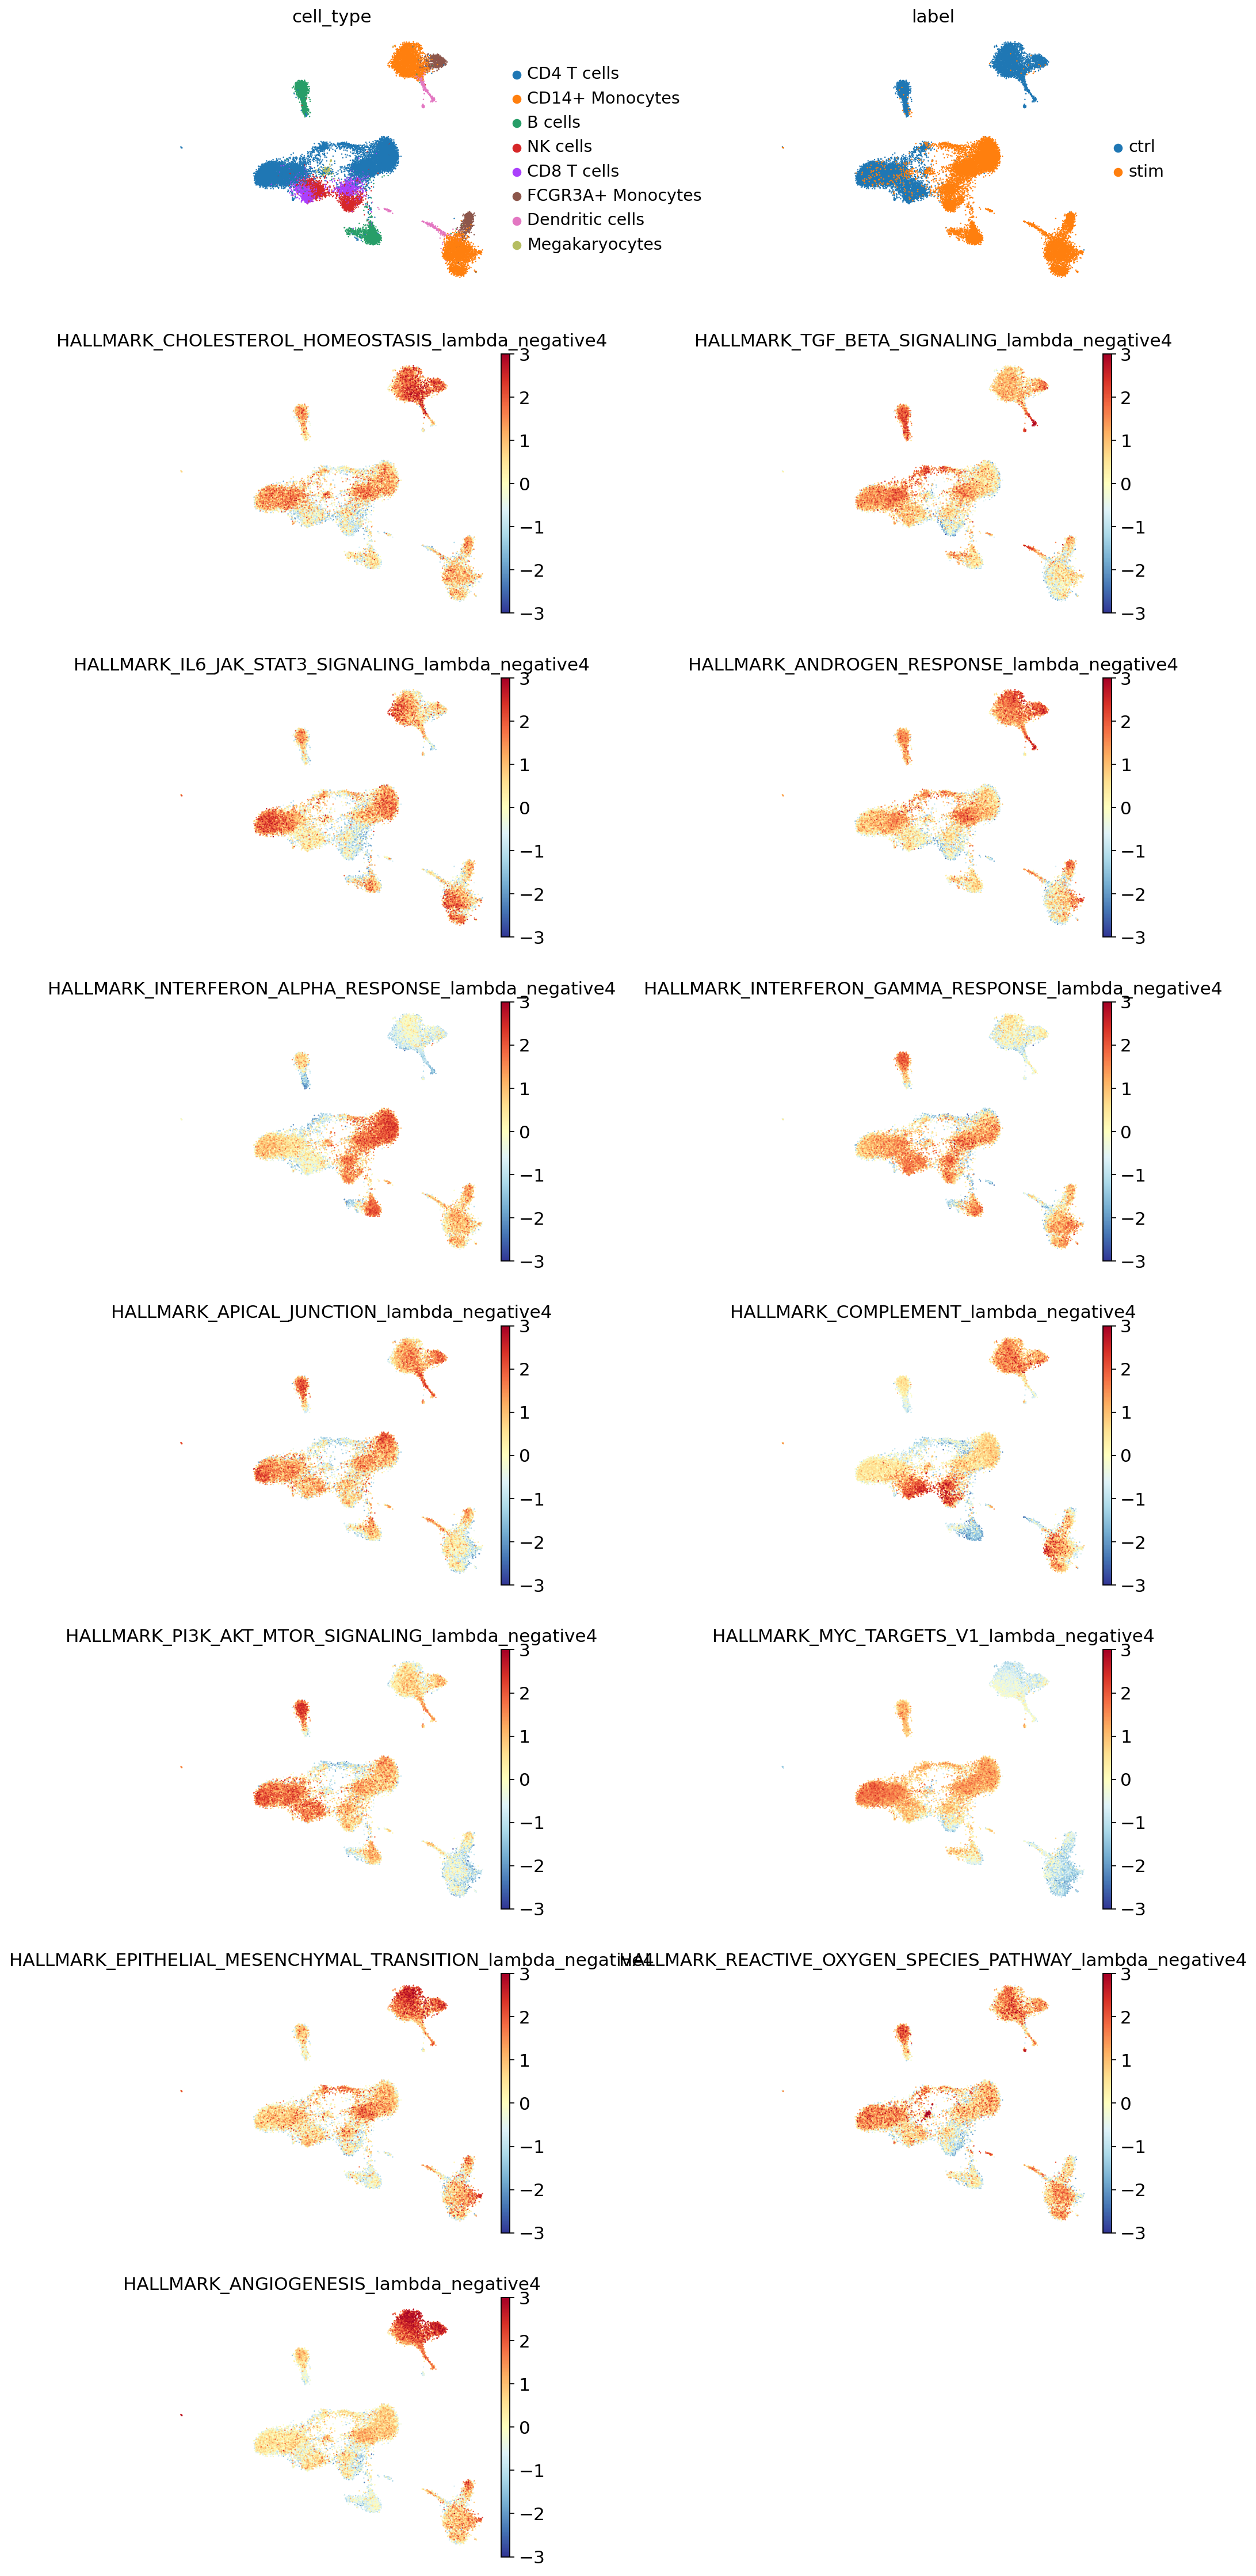

In [68]:
# is there a cell type with more selection
import matplotlib as mpl
sc.pl.umap(
    adata, 
    color=["cell_type",  
           "label",
          ] + selected_gs_, 
    frameon=False,
    wspace = 0.65,
    ncols=2,
    vmin = -3,
    vmax = 3,
    color_map=mpl.cm.RdYlBu_r, # RdYlBu, coolwarm
    save = '_kang_pbmc_25k_scDECAF_lambda_negative4.png'
)


In [69]:
adata.write('kang_25k_pbmc_wScDECAF_scores.h5ad')

In [107]:
# compare difference in scores between stim and control for B cells vs -log10 FDR from fgsea
# this is the cell type with largest effect
adata.obs['group'] = adata.obs.label.astype('string') + "_" + adata.obs.cell_type
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")
celltype_condition = 'stim_B cells'
ranked_genes_ = adata.uns['t-test']['names'][celltype_condition]
stats_ = adata.uns['t-test']['scores'][celltype_condition]

In [108]:
%%R -i ranked_genes_
ranked_genes = ranked_genes_

In [109]:
%%R -i stats_
stats = stats_
names(stats) = ranked_genes

In [110]:
# !wget -O 'c2.cp.reactome.v7.5.1.symbols.gmt' https://figshare.com/ndownloader/files/35233771

In [111]:
%%R
# pathways <- gmtPathways('c2.cp.reactome.v7.5.1.symbols.gmt')
pathways = HM_genesets

In [112]:
%%R
# save(pathways, stats, file = "fgsea_data.RData")

NULL


In [113]:
%%R
# fgseaRes <- fgsea(pathways = pathways, 
#                   stats    = stats,
#                   eps      = 0.0,
#                   minSize  = 15,
#                   maxSize  = 500)

# write.csv(as.data.frame(fgseaRes)[,-ncol(fgseaRes)], file = 'fgseaRes_stimBcells.csv')

NULL


In [114]:
%%R
fgseaRes = read.csv('fgseaRes_stimBcells.csv')
print(dim(fgseaRes))
head(fgseaRes)

[1] 40  7
                       pathway        pval       padj   log2err         ES
1        HALLMARK_ADIPOGENESIS 0.058977720 0.15920398 0.2114002 -0.6898174
2 HALLMARK_ALLOGRAFT_REJECTION 0.007418172 0.03709086 0.4070179 -0.6331290
3   HALLMARK_ANDROGEN_RESPONSE 0.500000000 0.55917026 0.1188150  0.3900466
4     HALLMARK_APICAL_JUNCTION 0.059701493 0.15920398 0.2042948 -0.6192277
5      HALLMARK_APICAL_SURFACE 0.019002521 0.08445565 0.3524879 -0.7651821
6           HALLMARK_APOPTOSIS 0.040816327 0.14842301 0.2450418 -0.6099177
         NES size
1 -1.4481238   20
2 -1.5375917   70
3  0.9428973   17
4 -1.4119133   37
5 -1.5580472   17
6 -1.4175659   48


In [115]:
celltype_labels_ = adata.obs.cell_type

In [116]:
%%R -i celltype_labels_
celltype_labels = celltype_labels_

In [117]:
%%R
print(table(celltype_labels))

celltype_labels
      CD4 T cells   CD14+ Monocytes           B cells          NK cells 
            11238              5697              2651              1716 
      CD8 T cells FCGR3A+ Monocytes   Dendritic cells    Megakaryocytes 
             1621              1089               529               132 


In [118]:
%%R
library(ggplot2)

hallmark_scores_stim_bcell = scores_uncons[celltype_labels == 'B cells',]
hallmark_scores_stim_bcell$cell_id = rownames(hallmark_scores_stim_bcell)
hallmark_scores_stim_bcell = reshape2::melt(hallmark_scores_stim_bcell, id = 'cell_id')


hallmark_scores_stim_bcell = aggregate(value ~ variable, 'mean', data = hallmark_scores_stim_bcell)


glmnet_coefs <- do.call(cbind, attributes(selected_gs)$"glmnet_coef")
glmnet_coefs <- as.matrix(glmnet_coefs)
rownames(glmnet_coefs) <- rownames(attributes(selected_gs)$glmnet_coef$y1)
glmnet_coefs <- glmnet_coefs[-1, ]
glmnet_coefs <- apply(glmnet_coefs, 1, FUN=function(x) max(abs(x)))
                      
hallmark_scores_stim_bcell$glmnet_coef = glmnet_coefs[match(hallmark_scores_stim_bcell$variable, names(glmnet_coefs))]
hallmark_scores_stim_bcell$glmnet_coef[is.na(hallmark_scores_stim_bcell$glmnet_coef)] <- 0

In [119]:
%%R
# colnames(hallmark_scores_stim_bcell) <- c("pathway",'ES', 'statistic')
# fgseaRes <- fgseaRes[match(hallmark_scores_stim_bcell$pathway, fgseaRes$pathway),]
fgseaRes <- fgseaRes[,c("pathway",'ES','padj','size')]
fgseaRes$padj <- -log10(fgseaRes$padj)
# colnames(fgseaRes)[3] <- 'statistic'


# hallmark_scores_stim_bcell$method <- 'scDECAF'
# fgseaRes$method <- 'fgsea'

# ggdat <- rbind(hallmark_scores_stim_bcell, fgseaRes)
head(hallmark_scores_stim_bcell)

                                           variable        value glmnet_coef
1    HALLMARK_TNFA_SIGNALING_VIA_NFKB_unconstrained  0.049051063           0
2                    HALLMARK_HYPOXIA_unconstrained  0.060052073           0
3    HALLMARK_CHOLESTEROL_HOMEOSTASIS_unconstrained  0.032456088           0
4            HALLMARK_MITOTIC_SPINDLE_unconstrained  0.033158560           0
5 HALLMARK_WNT_BETA_CATENIN_SIGNALING_unconstrained -0.007677942           0
6         HALLMARK_TGF_BETA_SIGNALING_unconstrained  0.044158435           0


In [120]:
%%R
hallmark_scores_stim_bcell$variable <- gsub('_unconstrained','', hallmark_scores_stim_bcell$variable)

In [121]:
%%R
dim(fgseaRes)

[1] 40  4


In [122]:
%%R
fgseaRes

                                      pathway         ES        padj size
1                       HALLMARK_ADIPOGENESIS -0.6898174  0.79804608   20
2                HALLMARK_ALLOGRAFT_REJECTION -0.6331290  1.43073309   70
3                  HALLMARK_ANDROGEN_RESPONSE  0.3900466  0.25245593   17
4                    HALLMARK_APICAL_JUNCTION -0.6192277  0.79804608   37
5                     HALLMARK_APICAL_SURFACE -0.7651821  1.07337129   17
6                          HALLMARK_APOPTOSIS -0.6099177  0.82849878   48
7               HALLMARK_BILE_ACID_METABOLISM -0.5113899  0.29735885   22
8            HALLMARK_CHOLESTEROL_HOMEOSTASIS -0.6829057  0.70524151   17
9                        HALLMARK_COAGULATION -0.8288701  3.27119874   27
10                        HALLMARK_COMPLEMENT -0.7908262  4.85171378   57
11                        HALLMARK_DNA_REPAIR -0.6097901  0.41009029   18
12                       HALLMARK_E2F_TARGETS  0.3633804  0.28944812   41
13 HALLMARK_EPITHELIAL_MESENCHYMAL_TRA

In [123]:
%%R
hallmark_scores_stim_bcell = hallmark_scores_stim_bcell[match(fgseaRes$pathway, hallmark_scores_stim_bcell$variable),]
dim(hallmark_scores_stim_bcell)

[1] 40  3


In [124]:
%%R
head(hallmark_scores_stim_bcell)

                       variable        value glmnet_coef
12        HALLMARK_ADIPOGENESIS  0.009071968           0
46 HALLMARK_ALLOGRAFT_REJECTION  0.129289847           0
15   HALLMARK_ANDROGEN_RESPONSE  0.037809681           0
20     HALLMARK_APICAL_JUNCTION  0.050398529           0
21      HALLMARK_APICAL_SURFACE  0.014672186           0
10           HALLMARK_APOPTOSIS -0.028798766           0


In [125]:
%%R
ggdat <- data.frame('pathway' = fgseaRes$pathway,
#                     'scDECAF' = hallmark_scores_stim_bcell$glmnet_coef,
                    'scDECAF' = hallmark_scores_stim_bcell$value,
                    'fgsea' = fgseaRes$padj,
#                     'fgsea' = fgseaRes$pval,
                   'size' = fgseaRes$size)
head(ggdat)

                       pathway      scDECAF     fgsea size
1        HALLMARK_ADIPOGENESIS  0.009071968 0.7980461   20
2 HALLMARK_ALLOGRAFT_REJECTION  0.129289847 1.4307331   70
3   HALLMARK_ANDROGEN_RESPONSE  0.037809681 0.2524559   17
4     HALLMARK_APICAL_JUNCTION  0.050398529 0.7980461   37
5      HALLMARK_APICAL_SURFACE  0.014672186 1.0733713   17
6           HALLMARK_APOPTOSIS -0.028798766 0.8284988   48


In [126]:
%%R
max(ggdat$scDECAF)

[1] 0.1658397


In [127]:
%%R
ggdat

                                      pathway      scDECAF       fgsea size
1                       HALLMARK_ADIPOGENESIS  0.009071968  0.79804608   20
2                HALLMARK_ALLOGRAFT_REJECTION  0.129289847  1.43073309   70
3                  HALLMARK_ANDROGEN_RESPONSE  0.037809681  0.25245593   17
4                    HALLMARK_APICAL_JUNCTION  0.050398529  0.79804608   37
5                     HALLMARK_APICAL_SURFACE  0.014672186  1.07337129   17
6                          HALLMARK_APOPTOSIS -0.028798766  0.82849878   48
7               HALLMARK_BILE_ACID_METABOLISM  0.002358173  0.29735885   22
8            HALLMARK_CHOLESTEROL_HOMEOSTASIS  0.032456088  0.70524151   17
9                        HALLMARK_COAGULATION -0.062703364  3.27119874   27
10                        HALLMARK_COMPLEMENT -0.045541868  4.85171378   57
11                        HALLMARK_DNA_REPAIR  0.023163534  0.41009029   18
12                       HALLMARK_E2F_TARGETS  0.018791861  0.28944812   41
13 HALLMARK_

In [128]:
%%R
# fig.size <- function (height, width) {
#     options(repr.plot.height = height, repr.plot.width = width)
# }

# fig.size(7,7)

library(gridExtra)
library(ggrepel)
library(stringr)


pos <- position_jitter(width = 0.2, seed = 2, height = 0.15)


wrap_text <- function(string, n) {
  spaces <- str_locate_all(string, " ")[[1]][,1]
  chars  <- nchar(string)
  for(i in 1:floor(chars/n)) {
    s <- spaces[which.min(abs(spaces - n*i))]
    substring(string, s, s) <- "\n "
  }
  return(string)
}



# ggdat$pathway <- sapply(ggdat$pathway, wrap_text, n= 35)


p <- ggplot(ggdat, aes(x=fgsea, y = scDECAF, size = size, label = pathway)) +
geom_point(color = '#5A5571') + 
geom_point(data = subset(ggdat, (pathway %in% as.character(selected_gs)) | (fgsea > 1.3)),
                        aes(x=fgsea, y = scDECAF), color = '#C1272D', show.legend = FALSE) + 

geom_vline(xintercept = 1.3, 
               color = "grey50", 
               linetype="dashed",
               size = 1.2)+

geom_text_repel(data = subset(ggdat, (pathway %in% as.character(selected_gs)) | (fgsea > 1.3)),
                        aes(x=fgsea, y = scDECAF, label = pathway),
                              size = 3.5, 
                    force_pull = 0.2,
                    force = 10,
                   segment.size = 0.35,
#                     position = 1,
                    nudge_x = 0.03, 
                    nudge_y =0.02,
                    check_overlap = TRUE,
#                     max.overlaps = 5
                              ) +

labs(x = expression(GSEA~-log[10](FDR)),
         y = 'scDECAF Mean cosine similarity', title = expression(IFN-beta~Stimulated~vs.~Ctrl~B~cells)) + 


theme_bw() + theme(
      legend.key.size = unit(0.05, 'cm'),
      #legend.position = c(0.28, 1),
      #legend.position = "None",
      panel.border = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(), 
      axis.line = element_line(colour = "black"),
      axis.text =  element_text(colour = "black", size = 12)) + 
    scale_x_continuous(sec.axis=sec_axis(~., labels = NULL,breaks = NULL)) +
    scale_y_continuous(sec.axis=sec_axis(~., labels = NULL,breaks = NULL))



# png(file = "figures/scdecaf_vs_gsea_kang_pbmc.png", 
#       width=5, height=5, res=300)
p
# dev.off()
ggsave("figures/scdecaf_vs_gsea_kang_pbmc.png", units="in", width=8, height=6, dpi=300)


In [130]:
# split violin plots
plotdata = adata.obs[['cell_type','label'] + selected_gs_]
plotdata = pd.melt(plotdata, id_vars= ['cell_type','label'], value_vars=selected_gs_)
plotdata

cell_type label  \
0       CD14+ Monocytes  ctrl   
1       CD14+ Monocytes  ctrl   
2           CD4 T cells  ctrl   
3       CD14+ Monocytes  ctrl   
4       Dendritic cells  ctrl   
...                 ...   ...   
320744      CD4 T cells  stim   
320745          B cells  stim   
320746      CD4 T cells  stim   
320747      CD4 T cells  stim   
320748      CD4 T cells  stim   

                                                 variable     value  
0       HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4  2.615746  
1       HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4  0.351304  
2       HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4 -0.440564  
3       HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4 -0.140786  
4       HALLMARK_CHOLESTEROL_HOMEOSTASIS_lambda_negative4 -1.398581  
...                                                   ...       ...  
320744             HALLMARK_ANGIOGENESIS_lambda_negative4 -0.519903  
320745             HALLMARK_ANGIOGENESIS_lambda_negative4 -0.106264  
320746             HALLMARK_ANGIOGENESIS_lambda_negative4 -0.620382  
320747             HALLMARK_ANGIOGENESIS_lambda_negative4  0.932504  
320748             HALLMARK_ANGIOGENESIS_lambda_negative4  0.365543  

[320749 rows x 4 columns]

In [131]:
import re
plotdata.variable = np.array([re.sub('_lambda_negative4', '',x) for x in plotdata.variable])
plotdata

cell_type label                          variable     value
0       CD14+ Monocytes  ctrl  HALLMARK_CHOLESTEROL_HOMEOSTASIS  2.615746
1       CD14+ Monocytes  ctrl  HALLMARK_CHOLESTEROL_HOMEOSTASIS  0.351304
2           CD4 T cells  ctrl  HALLMARK_CHOLESTEROL_HOMEOSTASIS -0.440564
3       CD14+ Monocytes  ctrl  HALLMARK_CHOLESTEROL_HOMEOSTASIS -0.140786
4       Dendritic cells  ctrl  HALLMARK_CHOLESTEROL_HOMEOSTASIS -1.398581
...                 ...   ...                               ...       ...
320744      CD4 T cells  stim             HALLMARK_ANGIOGENESIS -0.519903
320745          B cells  stim             HALLMARK_ANGIOGENESIS -0.106264
320746      CD4 T cells  stim             HALLMARK_ANGIOGENESIS -0.620382
320747      CD4 T cells  stim             HALLMARK_ANGIOGENESIS  0.932504
320748      CD4 T cells  stim             HALLMARK_ANGIOGENESIS  0.365543

[320749 rows x 4 columns]

In [132]:
plotdata.label = plotdata.label.astype('category')

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

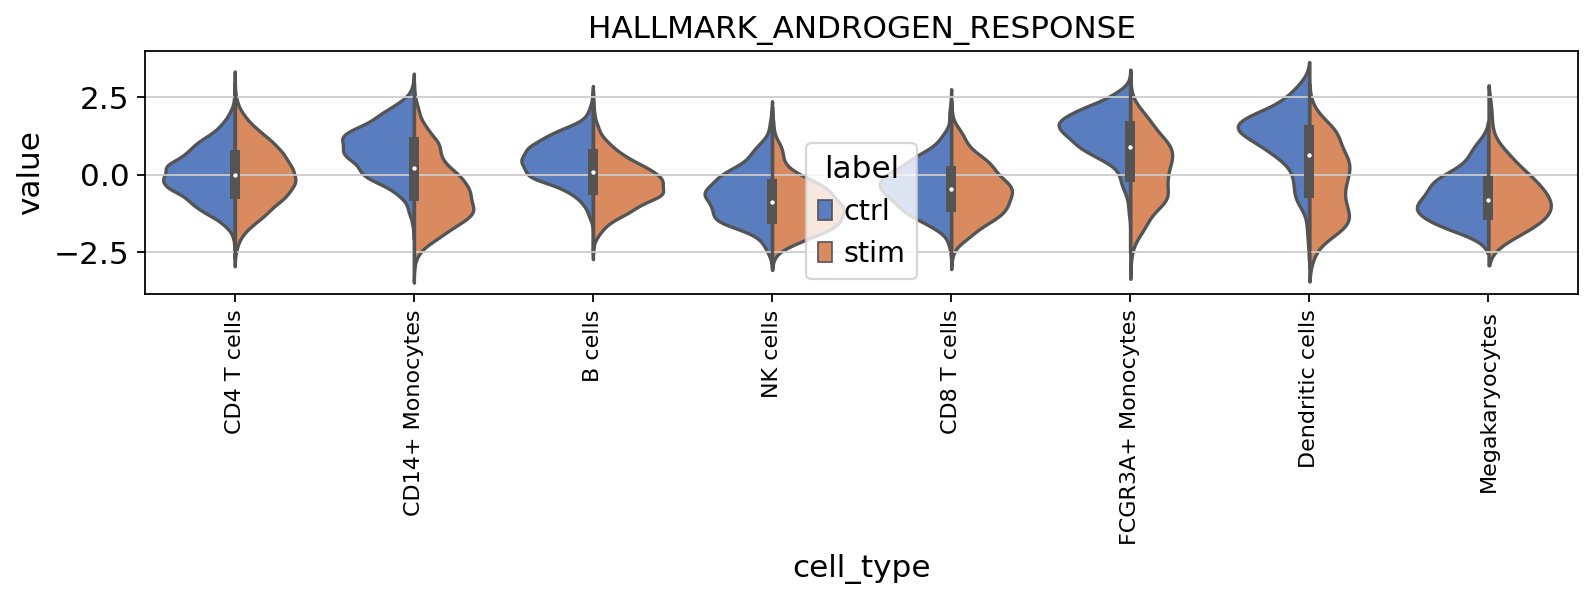

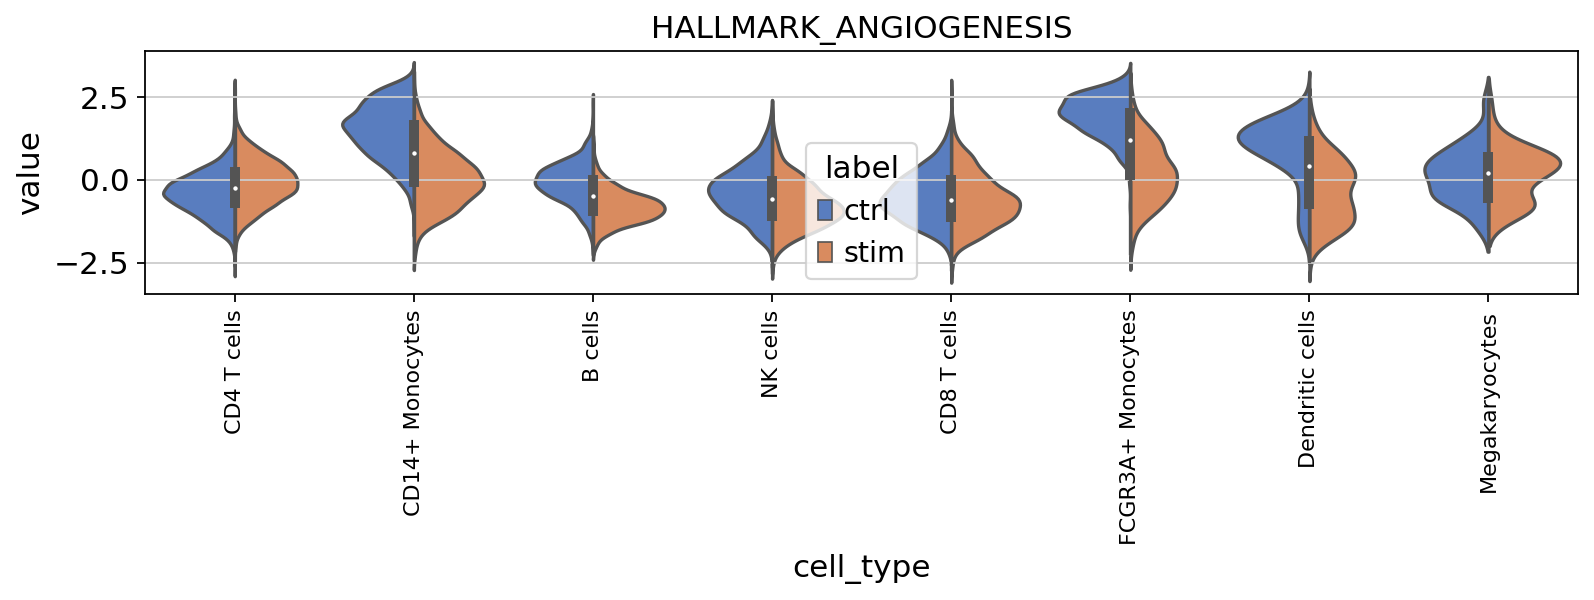

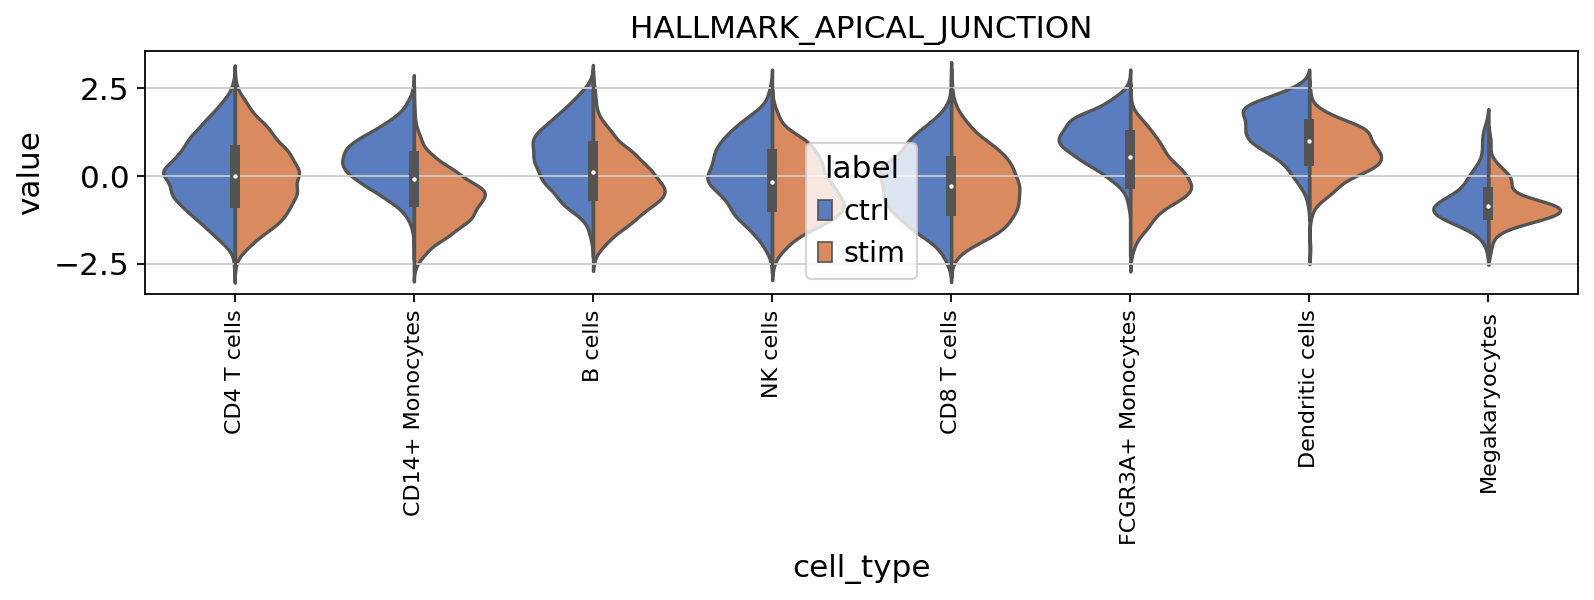

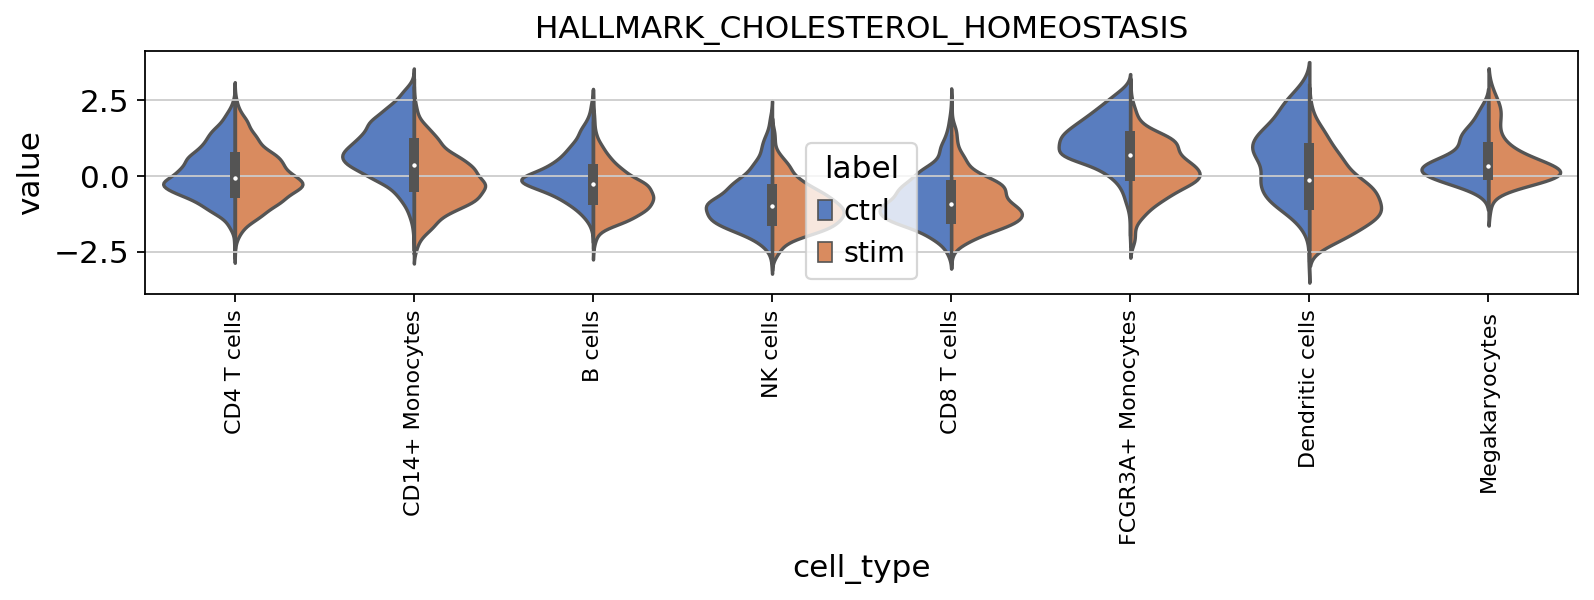

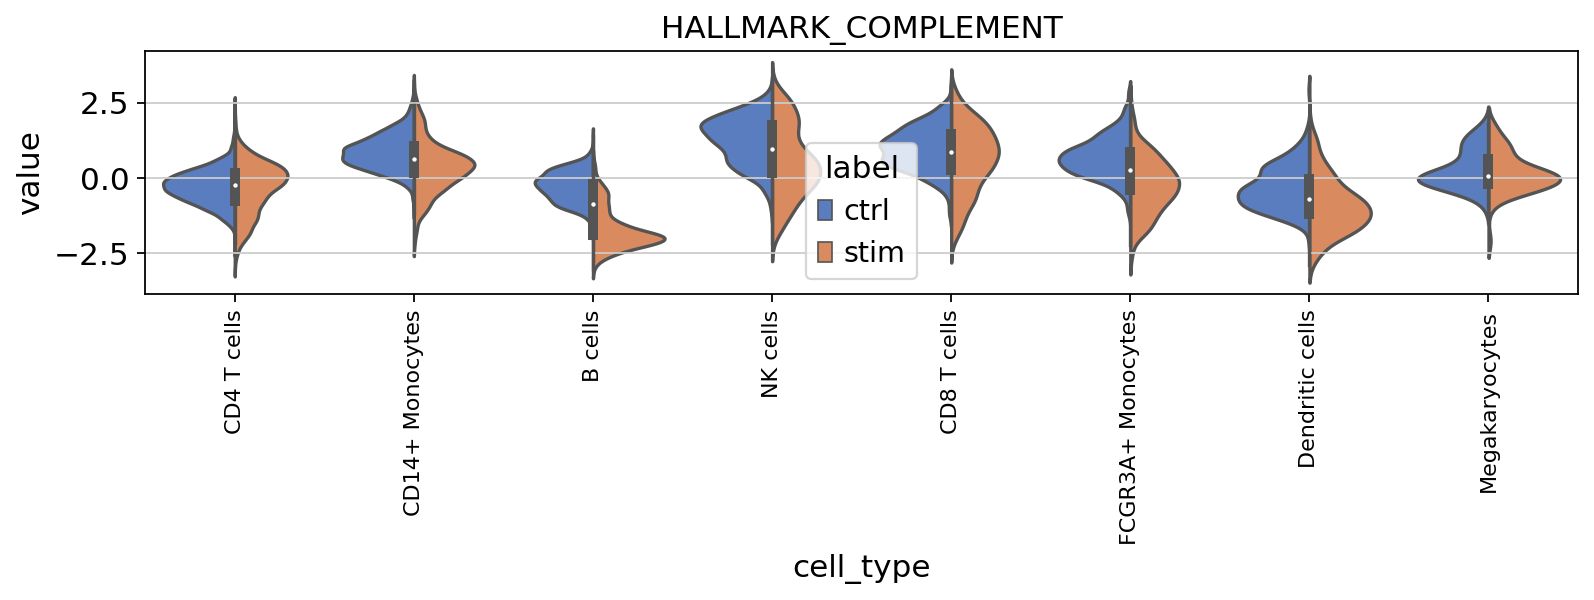

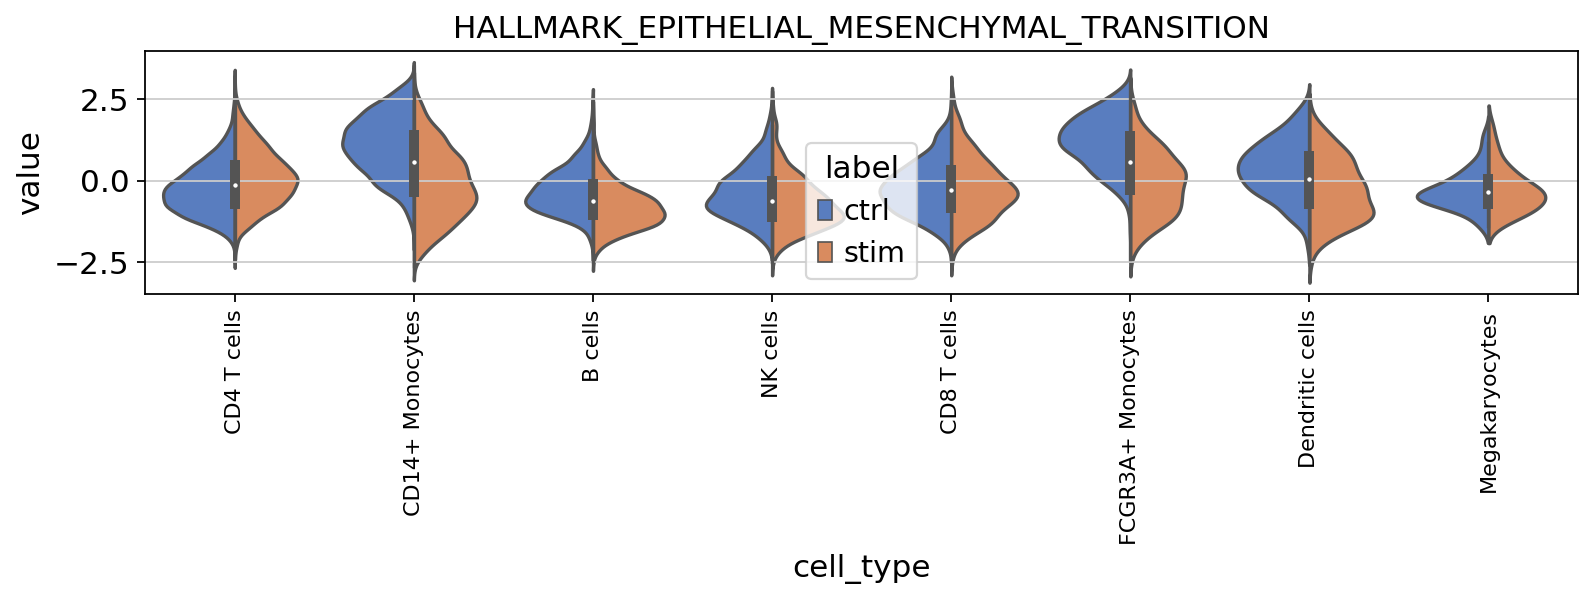

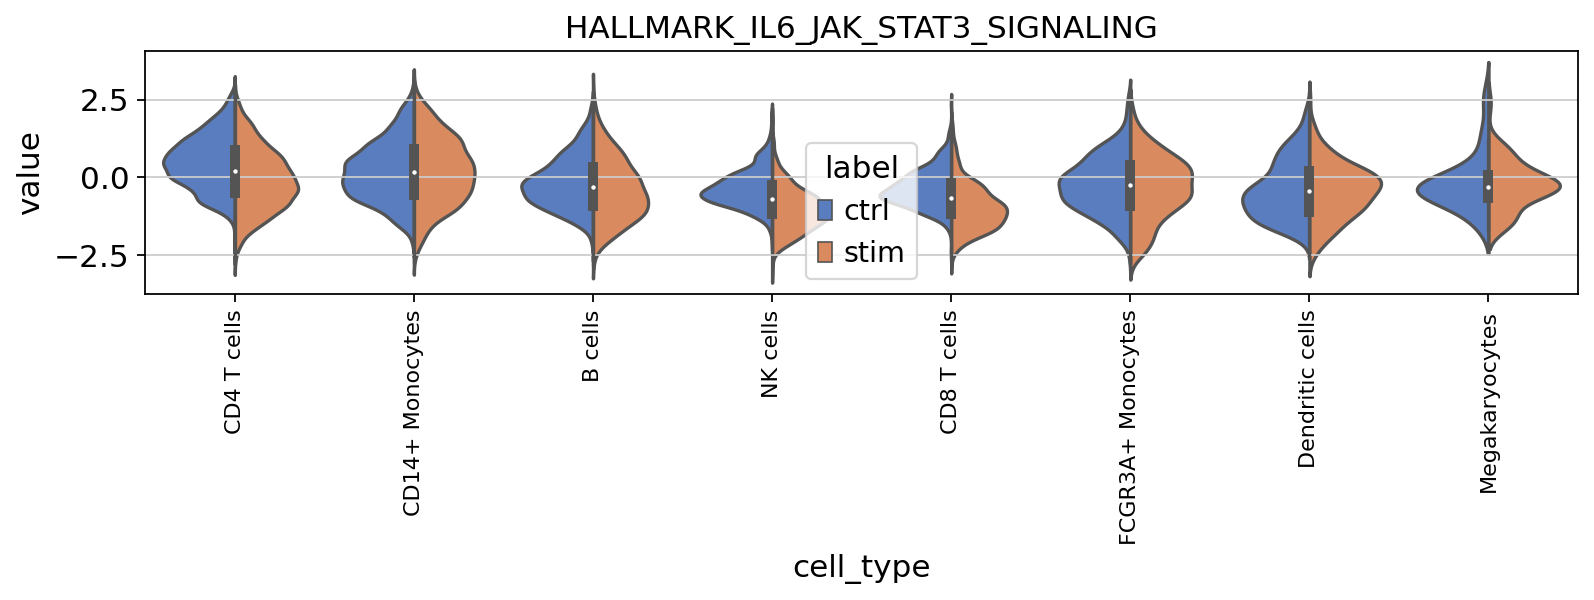

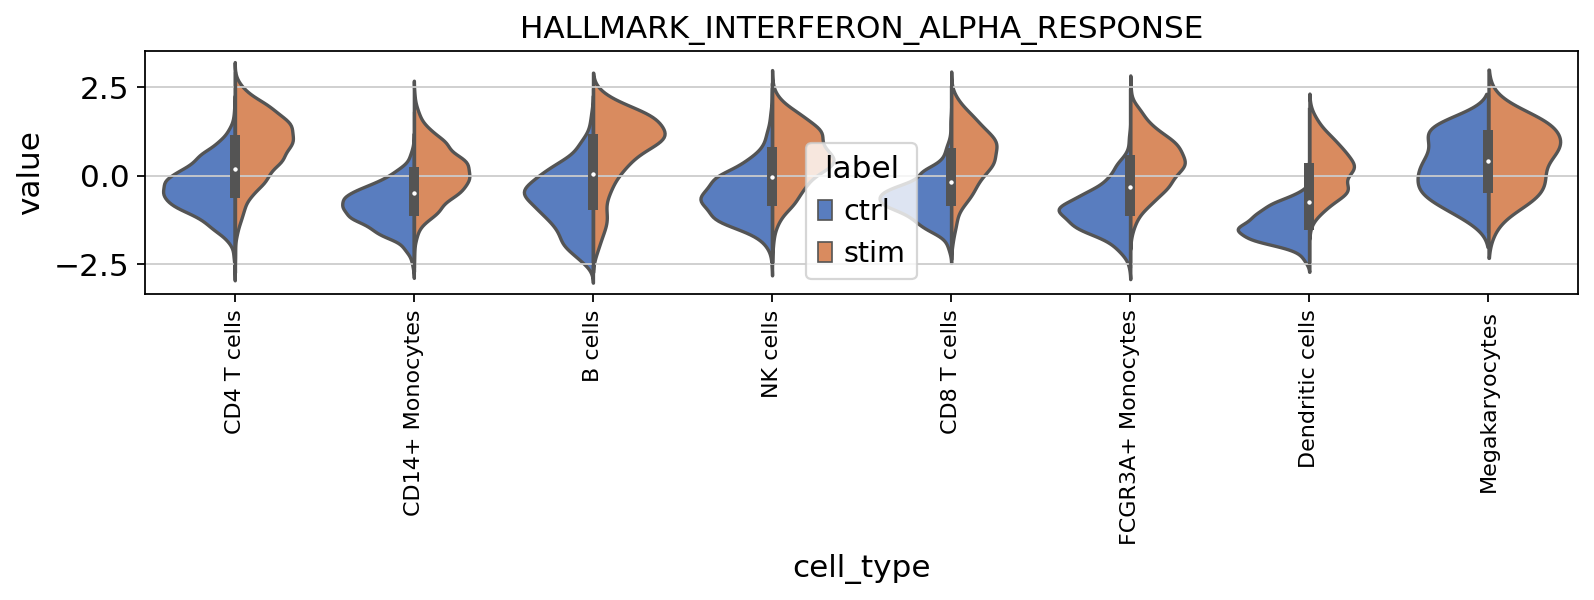

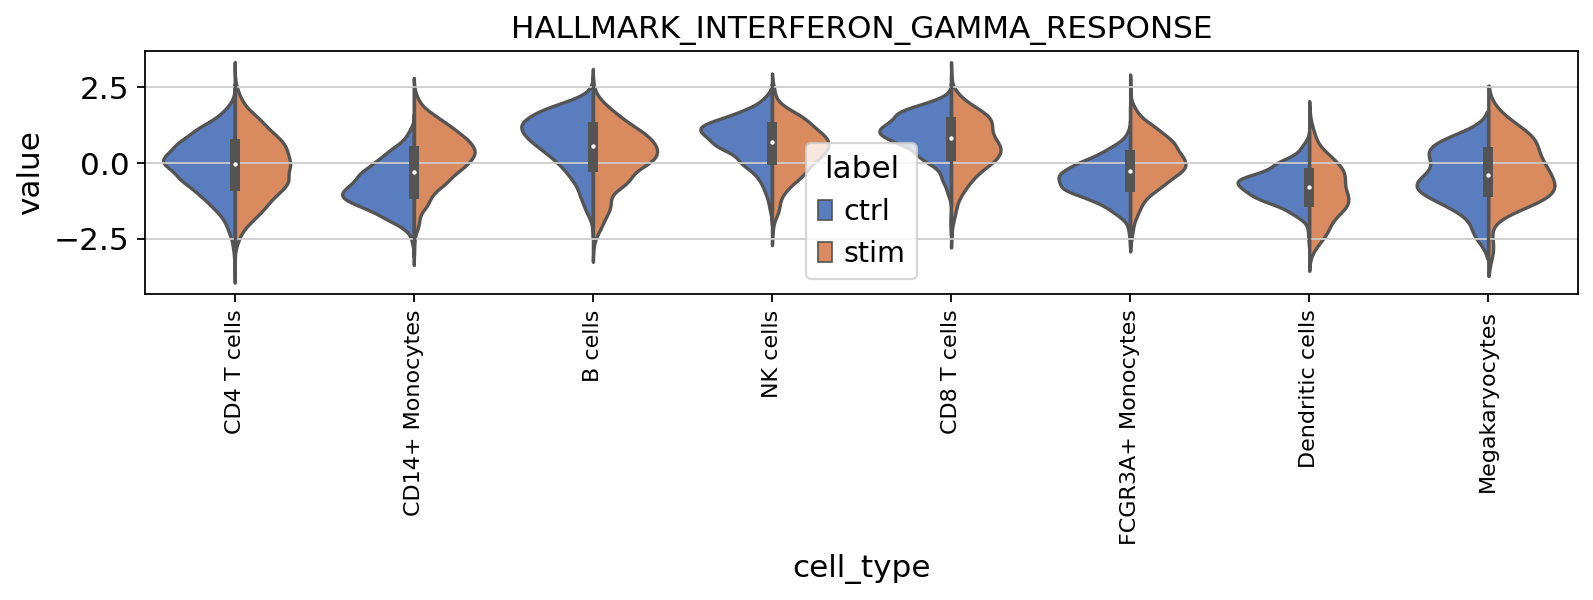

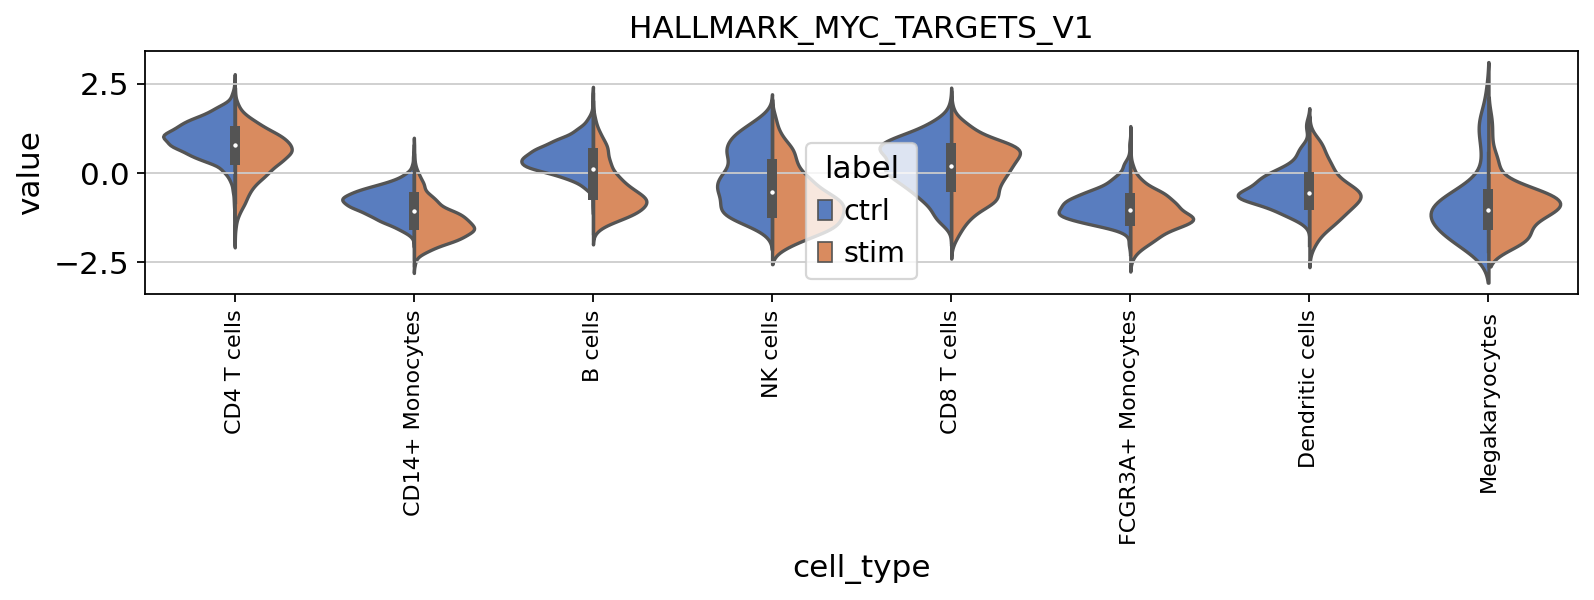

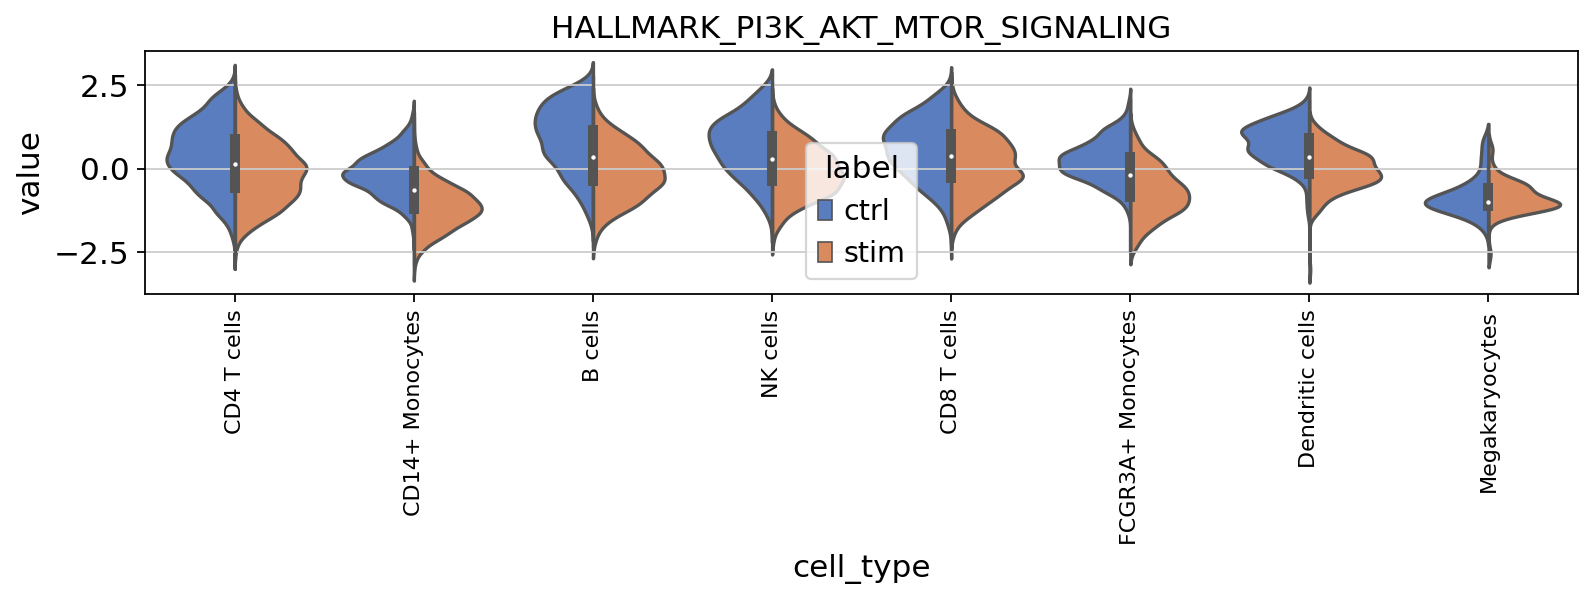

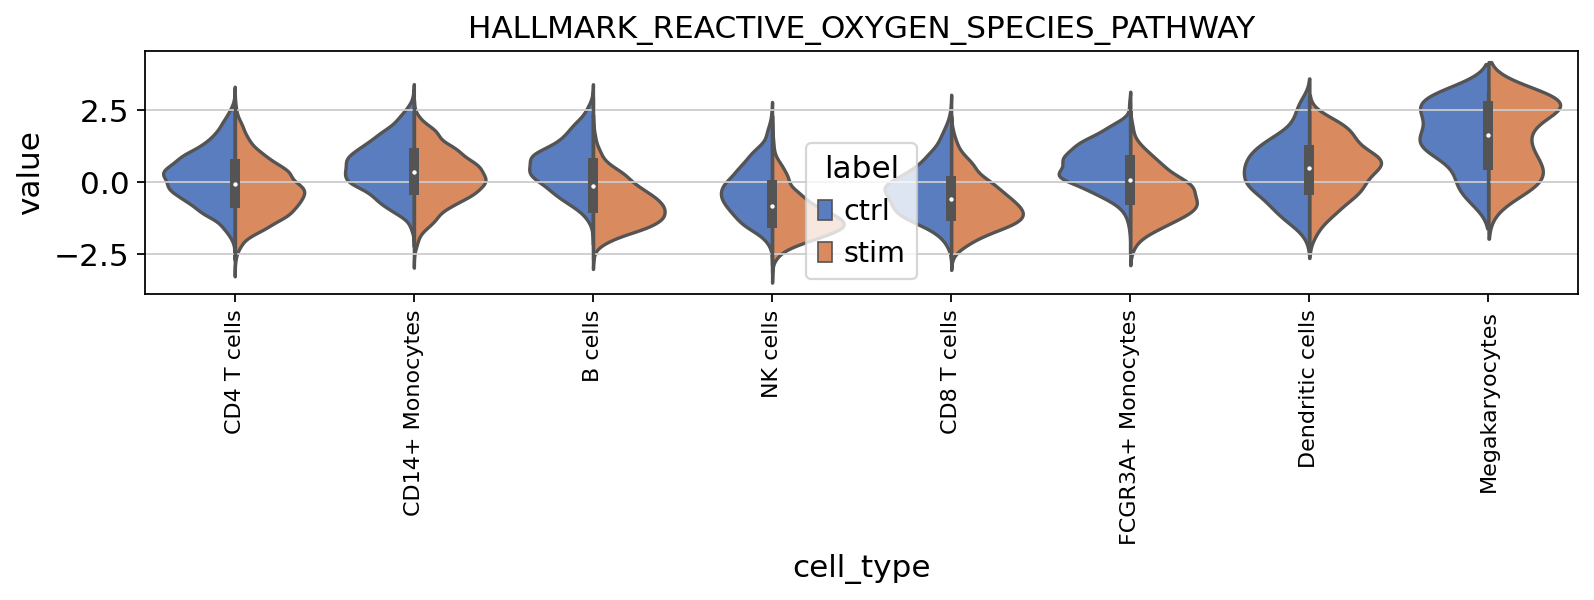

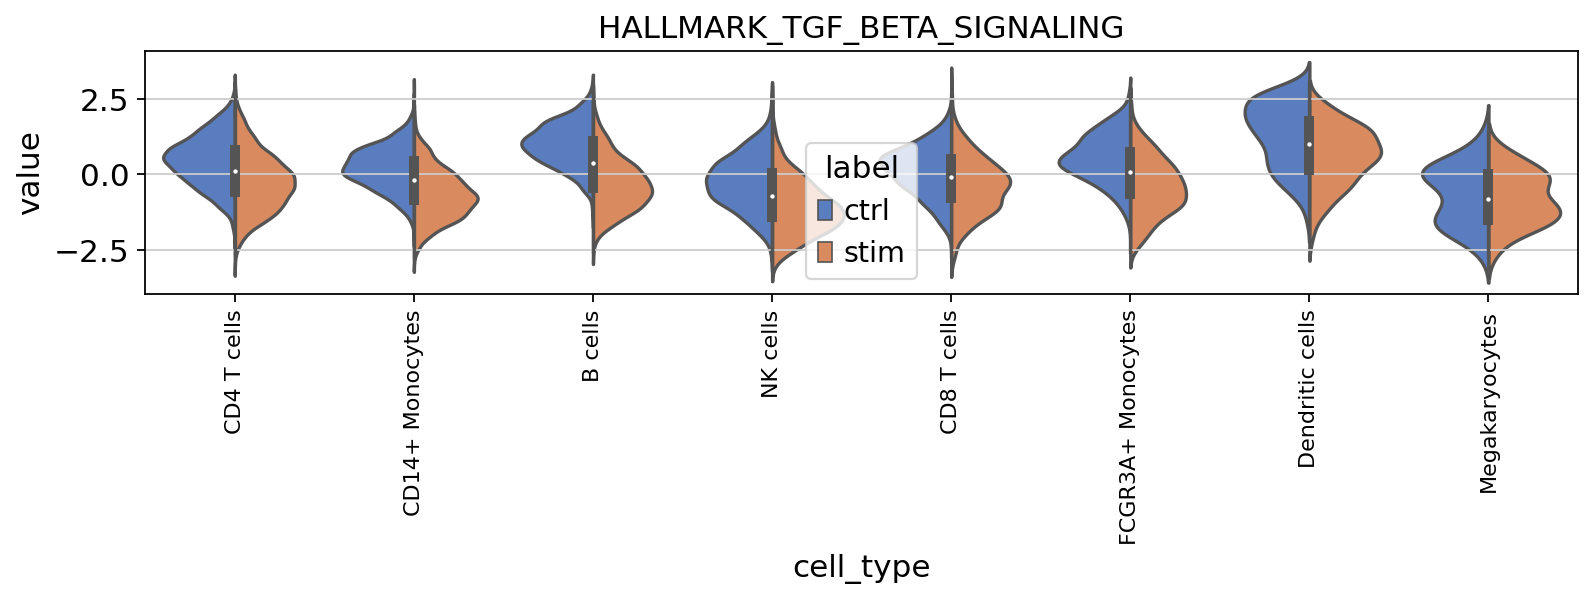

In [137]:
for pathway in plotdata.variable.astype('category').cat.categories:
    fig = plt.figure(figsize=(10, 4))
    splotdata = plotdata[plotdata.variable == pathway]
    ax = sns.violinplot(x="cell_type", y="value", hue="label",
                        data=splotdata, palette="muted", split=True)
    ax.set_title(pathway)
    plt.xticks(rotation=90, fontsize =10)
    fig.canvas.draw()
    fig.tight_layout()
    fig.savefig(f'figures/violin_pathway_{pathway}.png', bbox_inches='tight')

In [ ]:
%%R
sessionInfo()

In [ ]:
session_info.show()